<a href="https://colab.research.google.com/github/MounicaSrinivasan163/Trip_Fare_Prediction_Project/blob/main/TripFare___Predicting_Urban_Taxi_Fare_with_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [104]:
import warnings

# Suppress all warnings
warnings.filterwarnings('ignore')

In [105]:
# import pandas as pd

# good_data = []
# bad_rows = []

# # Read in chunks to handle large files
# chunksize = 10000  # Adjust based on available memory

# with pd.read_csv("/content/drive/MyDrive/taxi_fare.csv", chunksize=chunksize, on_bad_lines='warn') as reader:
#     for chunk in reader:
#         good_data.append(chunk)

# # Combine all good chunks
# df = pd.concat(good_data, ignore_index=True)


In [106]:
# import pandas as pd
# import geopandas as gpd

# # --- Step 1: Load your taxi fare dataset ---
# df = pd.read_csv("/content/drive/MyDrive/taxi_fare.csv")

# # --- Step 2: Load the NYC neighborhood shapefile ---
# nta_shapes = gpd.read_file("/content/NYC_NTA.geojson").to_crs(epsg=4326)

# # --- Step 3: Convert pickup and dropoff coordinates into GeoDataFrames ---
# pickup_gdf = gpd.GeoDataFrame(
#     df,
#     geometry=gpd.points_from_xy(df["pickup_longitude"], df["pickup_latitude"]),
#     crs="EPSG:4326"
# )

# dropoff_gdf = gpd.GeoDataFrame(
#     df,
#     geometry=gpd.points_from_xy(df["dropoff_longitude"], df["dropoff_latitude"]),
#     crs="EPSG:4326"
# )

# # --- Step 4: Spatial join to map coordinates to neighborhood names ---
# pickup_with_area = gpd.sjoin(pickup_gdf, nta_shapes, how="left", predicate="within")
# dropoff_with_area = gpd.sjoin(dropoff_gdf, nta_shapes, how="left", predicate="within")

# # --- Step 5: Add neighborhood names back to  original DataFrame ---
# df["pickup_area"] = pickup_with_area["ntaname"]
# df["dropoff_area"] = dropoff_with_area["ntaname"]

# # --- Step 6: Save results or view ---
# df.to_csv("taxi_fare_with_areas.csv", index=False)
# print(df[["pickup_area", "dropoff_area"]].head())


In [107]:
import pandas as pd

good_data = []
bad_rows = []

# Read in chunks to handle large files
chunksize = 10000  # Adjust based on available memory

with pd.read_csv("/content/drive/MyDrive/taxi_fare_with_areas.csv", chunksize=chunksize, on_bad_lines='warn') as reader:
    for chunk in reader:
        good_data.append(chunk)

# Combine all good chunks
df = pd.concat(good_data, ignore_index=True)


In [108]:
df.info() #check the data-types of all columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212345 entries, 0 to 212344
Data columns (total 20 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   VendorID               212345 non-null  int64  
 1   tpep_pickup_datetime   212345 non-null  object 
 2   tpep_dropoff_datetime  212345 non-null  object 
 3   passenger_count        212345 non-null  int64  
 4   pickup_longitude       212345 non-null  float64
 5   pickup_latitude        212345 non-null  float64
 6   RatecodeID             212345 non-null  int64  
 7   store_and_fwd_flag     212345 non-null  object 
 8   dropoff_longitude      212345 non-null  float64
 9   dropoff_latitude       212345 non-null  float64
 10  payment_type           212345 non-null  int64  
 11  fare_amount            212345 non-null  float64
 12  extra                  212345 non-null  float64
 13  mta_tax                212345 non-null  float64
 14  tip_amount             212345 non-nu

In [109]:
df.duplicated().sum() #check duplicates

np.int64(0)

In [110]:
df.isna().sum() #check null values

,0
VendorID,0
tpep_pickup_datetime,0
tpep_dropoff_datetime,0
passenger_count,0
pickup_longitude,0
pickup_latitude,0
RatecodeID,0
store_and_fwd_flag,0
dropoff_longitude,0
dropoff_latitude,0


In [111]:
df[df['pickup_area'].isna() & df['dropoff_area'].isna()]
#check for those rows wiht pickup and dropoff are being null

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,pickup_area,dropoff_area
95,2,2016-03-01 00:00:31,2016-03-01 00:09:06,1,-74.651306,40.609261,1,N,-74.651306,40.609261,1,6.5,0.5,0.5,1.00,0.00,0.3,8.80,NaN,NaN
116,2,2016-03-01 00:00:41,2016-03-01 00:11:39,1,0.000000,0.000000,1,N,0.000000,0.000000,1,12.0,0.5,0.5,3.32,0.00,0.3,16.62,NaN,NaN
365,2,2016-03-10 07:08:29,2016-03-10 07:32:55,2,0.000000,0.000000,1,N,0.000000,0.000000,1,28.0,0.0,0.5,10.30,5.54,0.3,44.64,NaN,NaN
478,2,2016-03-10 07:09:15,2016-03-10 07:40:06,1,0.000000,0.000000,3,N,0.000000,0.000000,1,66.0,0.0,0.0,16.36,15.50,0.3,98.16,NaN,NaN
491,2,2016-03-10 07:09:20,2016-03-10 07:17:52,5,0.000000,0.000000,1,N,0.000000,0.000000,1,8.0,0.0,0.5,1.76,0.00,0.3,10.56,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212064,1,2016-03-01 12:14:46,2016-03-01 12:35:16,1,0.000000,0.000000,1,N,0.000000,0.000000,3,15.0,0.0,0.5,0.00,0.00,0.3,15.80,NaN,NaN
212086,1,2016-03-01 12:14:50,2016-03-01 12:20:57,1,0.000000,0.000000,1,N,0.000000,0.000000,2,5.5,0.0,0.5,0.00,0.00,0.3,6.30,NaN,NaN
212209,1,2016-03-01 12:15:13,2016-03-01 12:28:19,1,0.000000,0.000000,1,N,0.000000,0.000000,2,10.5,0.0,0.5,0.00,0.00,0.3,11.30,NaN,NaN
212228,1,2016-03-01 12:15:16,2016-03-01 12:20:09,1,0.000000,0.000000,1,N,0.000000,0.000000,1,6.0,0.0,0.5,1.35,0.00,0.3,8.15,NaN,NaN


In [112]:
df=df[~(df['pickup_area'].isna() & df['dropoff_area'].isna())]  #ignore the rows which dont have both pickup and dropoff
df.isna().sum()

,0
VendorID,0
tpep_pickup_datetime,0
tpep_dropoff_datetime,0
passenger_count,0
pickup_longitude,0
pickup_latitude,0
RatecodeID,0
store_and_fwd_flag,0
dropoff_longitude,0
dropoff_latitude,0


In [113]:
df['pickup_area'].mode()[0],df["dropoff_area"].mode()[0]

('Midtown-Times Square', 'Midtown-Times Square')

In [114]:
#fill the na values with the mode value
df["pickup_area"].fillna(df['pickup_area'].mode()[0],inplace=True)
df["dropoff_area"].fillna(df["dropoff_area"].mode()[0],inplace=True)

In [115]:
df.isna().sum()

,0
VendorID,0
tpep_pickup_datetime,0
tpep_dropoff_datetime,0
passenger_count,0
pickup_longitude,0
pickup_latitude,0
RatecodeID,0
store_and_fwd_flag,0
dropoff_longitude,0
dropoff_latitude,0


In [116]:
df.describe()

,VendorID,passenger_count,pickup_longitude,pickup_latitude,RatecodeID,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,210072.000000,210072.000000,210072.000000,210072.000000,210072.000000,210072.000000,210072.000000,210072.000000,210072.000000,210072.000000,210072.000000,210072.000000,210072.000000,210072.000000,210072.000000
mean,1.709933,1.768208,-73.865231,40.694668,1.031789,-73.895162,40.709734,1.324465,12.635228,0.048057,0.497863,1.806771,0.329290,0.299653,15.616850
std,0.453794,1.471253,2.815917,1.549438,0.487446,2.409147,1.327415,0.477787,10.693738,0.147794,0.035986,2.480230,2.033278,0.013834,13.416007
min,1.000000,0.000000,-74.184555,0.000000,1.000000,-74.640816,0.000000,1.000000,-52.000000,-0.500000,-0.500000,-2.340000,0.000000,-0.300000,-52.800000
25%,1.000000,1.000000,-73.990982,40.740952,1.000000,-73.990694,40.740719,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,8.300000
50%,2.000000,1.000000,-73.979736,40.756130,1.000000,-73.978867,40.755714,1.000000,9.500000,0.000000,0.500000,1.350000,0.000000,0.300000,11.620000
75%,2.000000,2.000000,-73.963921,40.770458,1.000000,-73.965591,40.767689,2.000000,14.500000,0.000000,0.500000,2.360000,0.000000,0.300000,17.160000
max,2.000000,6.000000,0.000000,42.786934,99.000000,0.000000,42.666893,4.000000,819.500000,1.000000,0.500000,218.950000,661.080000,0.300000,832.800000


In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 210072 entries, 0 to 212344
Data columns (total 20 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   VendorID               210072 non-null  int64  
 1   tpep_pickup_datetime   210072 non-null  object 
 2   tpep_dropoff_datetime  210072 non-null  object 
 3   passenger_count        210072 non-null  int64  
 4   pickup_longitude       210072 non-null  float64
 5   pickup_latitude        210072 non-null  float64
 6   RatecodeID             210072 non-null  int64  
 7   store_and_fwd_flag     210072 non-null  object 
 8   dropoff_longitude      210072 non-null  float64
 9   dropoff_latitude       210072 non-null  float64
 10  payment_type           210072 non-null  int64  
 11  fare_amount            210072 non-null  float64
 12  extra                  210072 non-null  float64
 13  mta_tax                210072 non-null  float64
 14  tip_amount             210072 non-null  f

In [118]:
# Convert the datatype to datetime and assign back, skipping bad entries
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'], format='%Y-%m-%d %H:%M:%S', errors='coerce')
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'], format='%Y-%m-%d %H:%M:%S', errors='coerce')


In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 210072 entries, 0 to 212344
Data columns (total 20 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               210072 non-null  int64         
 1   tpep_pickup_datetime   210072 non-null  datetime64[ns]
 2   tpep_dropoff_datetime  210072 non-null  datetime64[ns]
 3   passenger_count        210072 non-null  int64         
 4   pickup_longitude       210072 non-null  float64       
 5   pickup_latitude        210072 non-null  float64       
 6   RatecodeID             210072 non-null  int64         
 7   store_and_fwd_flag     210072 non-null  object        
 8   dropoff_longitude      210072 non-null  float64       
 9   dropoff_latitude       210072 non-null  float64       
 10  payment_type           210072 non-null  int64         
 11  fare_amount            210072 non-null  float64       
 12  extra                  210072 non-null  float64  

In [120]:
df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,pickup_area,dropoff_area
0,1,2016-03-01 00:00:00,2016-03-01 00:07:55,1,-73.976746,40.765152,1,N,-74.004265,40.746128,1,9.0,0.5,0.5,2.05,0.00,0.3,12.35,Midtown-Times Square,Chelsea-Hudson Yards
1,1,2016-03-01 00:00:00,2016-03-01 00:11:06,1,-73.983482,40.767925,1,N,-74.005943,40.733166,1,11.0,0.5,0.5,3.05,0.00,0.3,15.35,Upper West Side-Lincoln Square,West Village
2,2,2016-03-01 00:00:00,2016-03-01 00:31:06,2,-73.782021,40.644810,1,N,-73.974541,40.675770,1,54.5,0.5,0.5,8.00,0.00,0.3,63.80,John F. Kennedy International Airport,Park Slope
3,2,2016-03-01 00:00:00,2016-03-01 00:00:00,3,-73.863419,40.769814,1,N,-73.969650,40.757767,1,31.5,0.0,0.5,3.78,5.54,0.3,41.62,LaGuardia Airport,East Midtown-Turtle Bay
4,2,2016-03-01 00:00:00,2016-03-01 00:00:00,5,-73.971741,40.792183,3,N,-74.177170,40.695053,1,98.0,0.0,0.0,0.00,15.50,0.3,113.80,Upper West Side (Central),Midtown-Times Square
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212340,2,2016-03-01 12:15:37,2016-03-01 12:38:53,1,-73.955688,40.782261,1,N,-73.974915,40.751282,1,16.0,0.0,0.5,3.36,0.00,0.3,20.16,Upper East Side-Carnegie Hill,East Midtown-Turtle Bay
212341,2,2016-03-01 12:15:37,2016-03-01 12:38:22,1,-74.002197,40.715042,1,N,-73.976295,40.739609,1,15.5,0.0,0.5,2.00,0.00,0.3,18.30,Tribeca-Civic Center,Murray Hill-Kips Bay
212342,2,2016-03-01 12:15:37,2016-03-01 12:18:18,1,-73.991173,40.733170,1,N,-73.994324,40.728531,1,4.0,0.0,0.5,0.00,0.00,0.3,4.80,Greenwich Village,Greenwich Village
212343,1,2016-03-01 12:15:38,2016-03-01 12:22:47,2,-73.972099,40.786446,1,N,-73.955872,40.779755,2,7.0,0.0,0.5,0.00,0.00,0.3,7.80,Upper West Side (Central),Upper East Side-Carnegie Hill


In [121]:
df['tpep_pickup_datetime'].isna().sum(),df['tpep_pickup_datetime'].isna().sum()

(np.int64(0), np.int64(0))

## Feature Engineering

In [122]:
# Step 1: Localize the naive datetime to UTC
df['tpep_pickup_datetime'] = df['tpep_pickup_datetime'].dt.tz_localize('UTC')

# Step 2: Convert to US/Eastern
df['tpep_pickup_datetime'] = df['tpep_pickup_datetime'].dt.tz_convert('US/Eastern')

In [123]:
# Step 1: Localize the naive datetime to UTC
df['tpep_dropoff_datetime'] = df['tpep_dropoff_datetime'].dt.tz_localize('UTC')

# Step 2: Convert to US/Eastern
df['tpep_dropoff_datetime'] = df['tpep_dropoff_datetime'].dt.tz_convert('US/Eastern')

In [124]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,pickup_area,dropoff_area
0,1,2016-02-29 19:00:00-05:00,2016-02-29 19:07:55-05:00,1,-73.976746,40.765152,1,N,-74.004265,40.746128,1,9.0,0.5,0.5,2.05,0.00,0.3,12.35,Midtown-Times Square,Chelsea-Hudson Yards
1,1,2016-02-29 19:00:00-05:00,2016-02-29 19:11:06-05:00,1,-73.983482,40.767925,1,N,-74.005943,40.733166,1,11.0,0.5,0.5,3.05,0.00,0.3,15.35,Upper West Side-Lincoln Square,West Village
2,2,2016-02-29 19:00:00-05:00,2016-02-29 19:31:06-05:00,2,-73.782021,40.644810,1,N,-73.974541,40.675770,1,54.5,0.5,0.5,8.00,0.00,0.3,63.80,John F. Kennedy International Airport,Park Slope
3,2,2016-02-29 19:00:00-05:00,2016-02-29 19:00:00-05:00,3,-73.863419,40.769814,1,N,-73.969650,40.757767,1,31.5,0.0,0.5,3.78,5.54,0.3,41.62,LaGuardia Airport,East Midtown-Turtle Bay
4,2,2016-02-29 19:00:00-05:00,2016-02-29 19:00:00-05:00,5,-73.971741,40.792183,3,N,-74.177170,40.695053,1,98.0,0.0,0.0,0.00,15.50,0.3,113.80,Upper West Side (Central),Midtown-Times Square


In [125]:
df['Day'] = df['tpep_pickup_datetime'].dt.day
df['Month'] = df['tpep_pickup_datetime'].dt.month
df['Year'] = df['tpep_pickup_datetime'].dt.year
#extract day,month,year from datetime column

In [126]:
#calculate total duration of the trip in minutes
df['duration'] = df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']
df['duration'] = df['duration'].dt.total_seconds()/60
df['duration'] = df['duration'].round(2)
df['duration']

,duration
0,7.92
1,11.10
2,31.10
3,0.00
4,0.00
...,...
212340,23.27
212341,22.75
212342,2.68
212343,7.15


In [127]:
#calculate weekday from which create a column which has boolen values to suggest if that is a weekend or not
df['day_of_week'] = df['tpep_pickup_datetime'].dt.dayofweek
df['is_Weekend'] = df['day_of_week'].apply(lambda x: 1 if x >= 5 else 0)

In [128]:
df['Day'].unique()

array([29, 10,  1], dtype=int32)

In [129]:
df['day_of_week'].unique()

array([0, 3, 1], dtype=int32)

In [130]:
df['is_Weekend'].unique()

array([0])

In [131]:
#since there is no weekend info we can delete the column

df.drop("is_Weekend",axis=1,inplace=True)

In [132]:
df['hour'] = df['tpep_pickup_datetime'].dt.hour

In [133]:
df['hour'].unique()

array([19,  2,  3,  4,  5,  6,  7,  8, 20, 21, 22, 23,  0,  1,  9],
      dtype=int32)

In [134]:
df['am/pm'] = df['hour'].apply(lambda x: 'am' if x < 12 else 'pm') #from the hours of the day make a column if it is am or pm

In [135]:
df['is_late_night']=df['hour'].apply(lambda x: 1 if x>=22 or x<=5 else 0)
#make a column 'is_late_night' by applying condition if it is >10 in the night ie.22 hrs and < 5 in morning it is late night

In [136]:
import numpy as np
#haversine formula to calculate trip distance
def haversine(lat1, lon1, lat2, lon2):
    R = 6371  # Earth radius in kilometers

    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])

    dlat = lat2 - lat1
    dlon = lon2 - lon1

    a = np.sin(dlat / 2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2)**2
    c = 2 * np.arcsin(np.sqrt(a))

    return R * c


In [137]:
df['trip_distance_km'] = haversine(df['pickup_latitude'], df['pickup_longitude'],
                                   df['dropoff_latitude'], df['dropoff_longitude'])
df['trip_distance_km']=df['trip_distance_km'].round(2)

In [138]:
df[df['trip_distance_km']==0]
#some rows have zero for trip distance their pickup and dropoff cordinated are same suggesting very short trips

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,...,dropoff_area,Day,Month,Year,duration,day_of_week,hour,am/pm,is_late_night,trip_distance_km
129,2,2016-02-29 19:00:45-05:00,2016-02-29 19:39:48-05:00,3,-73.793167,40.656830,5,N,-73.793167,40.656830,...,John F. Kennedy International Airport,29,2,2016,39.05,0,19,pm,0,0.0
566,2,2016-03-10 02:09:53-05:00,2016-03-10 02:42:18-05:00,6,-74.006088,40.706421,1,N,-74.006088,40.706421,...,Financial District-Battery Park City,10,3,2016,32.42,3,2,am,1,0.0
872,2,2016-03-10 02:11:55-05:00,2016-03-10 02:13:17-05:00,5,-73.902115,40.764221,1,N,-73.902077,40.764233,...,St. Michael's Cemetery,10,3,2016,1.37,3,2,am,1,0.0
1055,2,2016-03-10 02:13:06-05:00,2016-03-10 02:13:10-05:00,1,-73.979973,40.764660,1,N,-73.979950,40.764629,...,Midtown-Times Square,10,3,2016,0.07,3,2,am,1,0.0
1309,2,2016-03-10 02:14:39-05:00,2016-03-10 02:16:42-05:00,1,-73.901962,40.763931,1,N,-73.901970,40.763939,...,St. Michael's Cemetery,10,3,2016,2.05,3,2,am,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211083,1,2016-03-01 07:11:31-05:00,2016-03-01 07:22:29-05:00,1,-73.962250,40.772907,1,N,-73.962250,40.772907,...,Upper East Side-Carnegie Hill,1,3,2016,10.97,1,7,am,0,0.0
211394,1,2016-03-01 07:12:33-05:00,2016-03-01 07:12:35-05:00,1,-73.979843,40.682991,1,N,-73.979881,40.682987,...,Downtown Brooklyn-DUMBO-Boerum Hill,1,3,2016,0.03,1,7,am,0,0.0
211414,2,2016-03-01 07:12:35-05:00,2016-03-01 07:17:48-05:00,1,-73.976059,40.752819,1,N,-73.976059,40.752819,...,East Midtown-Turtle Bay,1,3,2016,5.22,1,7,am,0,0.0
211553,1,2016-03-01 07:13:02-05:00,2016-03-01 07:17:19-05:00,1,-73.969193,40.795025,1,N,-73.969193,40.795025,...,Upper West Side-Manhattan Valley,1,3,2016,4.28,1,7,am,0,0.0


In [139]:
df.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude', 'RatecodeID',
       'store_and_fwd_flag', 'dropoff_longitude', 'dropoff_latitude',
       'payment_type', 'fare_amount', 'extra', 'mta_tax', 'tip_amount',
       'tolls_amount', 'improvement_surcharge', 'total_amount', 'pickup_area',
       'dropoff_area', 'Day', 'Month', 'Year', 'duration', 'day_of_week',
       'hour', 'am/pm', 'is_late_night', 'trip_distance_km'],
      dtype='object')

In [140]:
# df.drop(["tpep_pickup_datetime","tpep_dropoff_datetime"],axis=1,inplace=True)

## Exploratory Data Analysis

In [141]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 210072 entries, 0 to 212344
Data columns (total 29 columns):
 #   Column                 Non-Null Count   Dtype                     
---  ------                 --------------   -----                     
 0   VendorID               210072 non-null  int64                     
 1   tpep_pickup_datetime   210072 non-null  datetime64[ns, US/Eastern]
 2   tpep_dropoff_datetime  210072 non-null  datetime64[ns, US/Eastern]
 3   passenger_count        210072 non-null  int64                     
 4   pickup_longitude       210072 non-null  float64                   
 5   pickup_latitude        210072 non-null  float64                   
 6   RatecodeID             210072 non-null  int64                     
 7   store_and_fwd_flag     210072 non-null  object                    
 8   dropoff_longitude      210072 non-null  float64                   
 9   dropoff_latitude       210072 non-null  float64                   
 10  payment_type           21

In [142]:
df.describe()

,VendorID,passenger_count,pickup_longitude,pickup_latitude,RatecodeID,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,...,improvement_surcharge,total_amount,Day,Month,Year,duration,day_of_week,hour,is_late_night,trip_distance_km
count,210072.000000,210072.000000,210072.000000,210072.000000,210072.000000,210072.000000,210072.000000,210072.000000,210072.000000,210072.000000,...,210072.000000,210072.000000,210072.000000,210072.000000,210072.0,210072.000000,210072.000000,210072.000000,210072.000000,210072.000000
mean,1.709933,1.768208,-73.865231,40.694668,1.031789,-73.895162,40.709734,1.324465,12.635228,0.048057,...,0.299653,15.616850,6.793918,2.917238,2016.0,16.165927,1.689811,5.722414,0.644303,24.974551
std,0.453794,1.471253,2.815917,1.549438,0.487446,2.409147,1.327415,0.477787,10.693738,0.147794,...,0.013834,13.416007,7.912364,0.275523,0.0,56.173233,1.073347,4.873676,0.478725,433.421878
min,1.000000,0.000000,-74.184555,0.000000,1.000000,-74.640816,0.000000,1.000000,-52.000000,-0.500000,...,-0.300000,-52.800000,1.000000,2.000000,2016.0,-7174.580000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,-73.990982,40.740952,1.000000,-73.990694,40.740719,1.000000,6.500000,0.000000,...,0.300000,8.300000,1.000000,3.000000,2016.0,6.730000,1.000000,3.000000,0.000000,1.180000
50%,2.000000,1.000000,-73.979736,40.756130,1.000000,-73.978867,40.755714,1.000000,9.500000,0.000000,...,0.300000,11.620000,1.000000,3.000000,2016.0,11.280000,1.000000,4.000000,1.000000,1.960000
75%,2.000000,2.000000,-73.963921,40.770458,1.000000,-73.965591,40.767689,2.000000,14.500000,0.000000,...,0.300000,17.160000,10.000000,3.000000,2016.0,18.320000,3.000000,6.000000,1.000000,3.600000
max,2.000000,6.000000,0.000000,42.786934,99.000000,0.000000,42.666893,4.000000,819.500000,1.000000,...,0.300000,832.800000,29.000000,3.000000,2016.0,1439.380000,3.000000,23.000000,1.000000,8667.950000


In [143]:
df['Year'].value_counts()

,count
Year,
2016,210072


In [144]:
df.drop('Year',axis=1,inplace=True) #only one year info is available we can drop it

In [145]:
df['Month'].value_counts()

,count
Month,
3,192686
2,17386


In [146]:
df['am/pm'].value_counts(),df['is_late_night'].value_counts(),df['day_of_week'].value_counts()

(am/pm
 am    192686
 pm     17386
 Name: count, dtype: int64,
 is_late_night
 1    135350
 0     74722
 Name: count, dtype: int64,
 day_of_week
 1    111538
 3     81148
 0     17386
 Name: count, dtype: int64)

### Univariate Analysis

In [147]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 210072 entries, 0 to 212344
Data columns (total 28 columns):
 #   Column                 Non-Null Count   Dtype                     
---  ------                 --------------   -----                     
 0   VendorID               210072 non-null  int64                     
 1   tpep_pickup_datetime   210072 non-null  datetime64[ns, US/Eastern]
 2   tpep_dropoff_datetime  210072 non-null  datetime64[ns, US/Eastern]
 3   passenger_count        210072 non-null  int64                     
 4   pickup_longitude       210072 non-null  float64                   
 5   pickup_latitude        210072 non-null  float64                   
 6   RatecodeID             210072 non-null  int64                     
 7   store_and_fwd_flag     210072 non-null  object                    
 8   dropoff_longitude      210072 non-null  float64                   
 9   dropoff_latitude       210072 non-null  float64                   
 10  payment_type           21

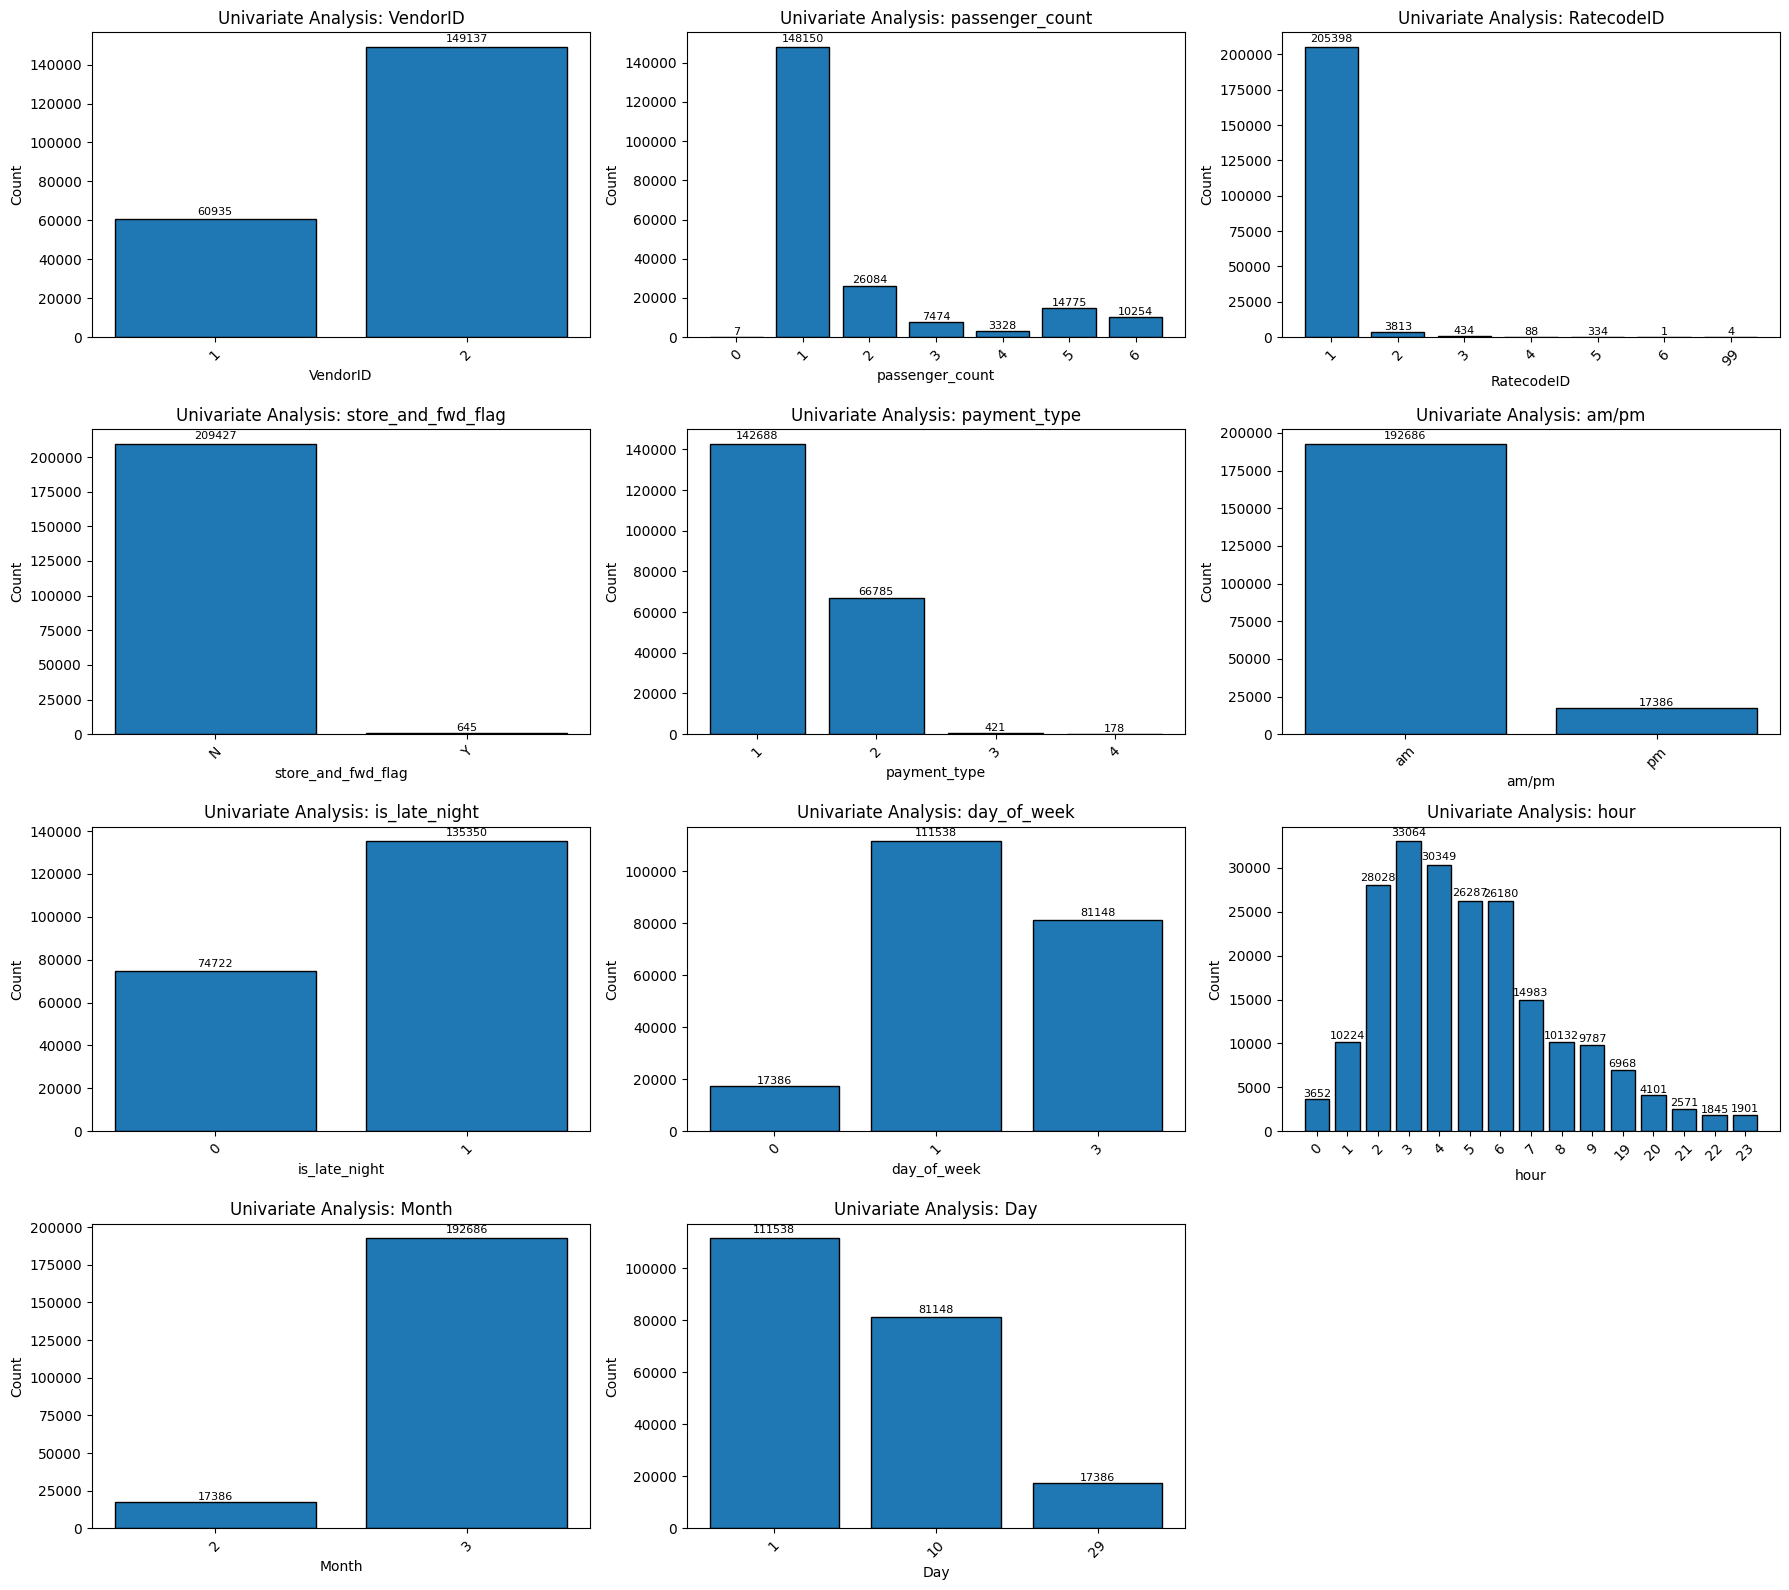

In [148]:
import matplotlib.pyplot as plt

# List of categorical columns in your dataset
categorical_columns = [
    'VendorID', 'passenger_count', 'RatecodeID', 'store_and_fwd_flag',
    'payment_type', 'am/pm', 'is_late_night',
    'day_of_week', 'hour', 'Month', 'Day'
]

def plot_categorical_univariate(df, columns):
    n_cols = 3
    n_rows = (len(columns) + n_cols - 1) // n_cols
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 4 * n_rows))
    axes = axes.flatten()

    for i, col in enumerate(columns):
        ax = axes[i]
        value_counts = df[col].value_counts().sort_index()

        bars = ax.bar(value_counts.index.astype(str), value_counts.values, edgecolor='black')

        # Add value labels on top of each bar
        for bar in bars:
            height = bar.get_height()
            ax.text(bar.get_x() + bar.get_width()/2, height + height*0.01, f'{int(height)}',
                    ha='center', va='bottom', fontsize=8)

        ax.set_title(f'Univariate Analysis: {col}', fontsize=12)
        ax.set_xlabel(col, fontsize=10)
        ax.set_ylabel('Count', fontsize=10)
        ax.tick_params(axis='x', rotation=45)

    # Remove any unused subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

# Call the function
plot_categorical_univariate(df, categorical_columns)


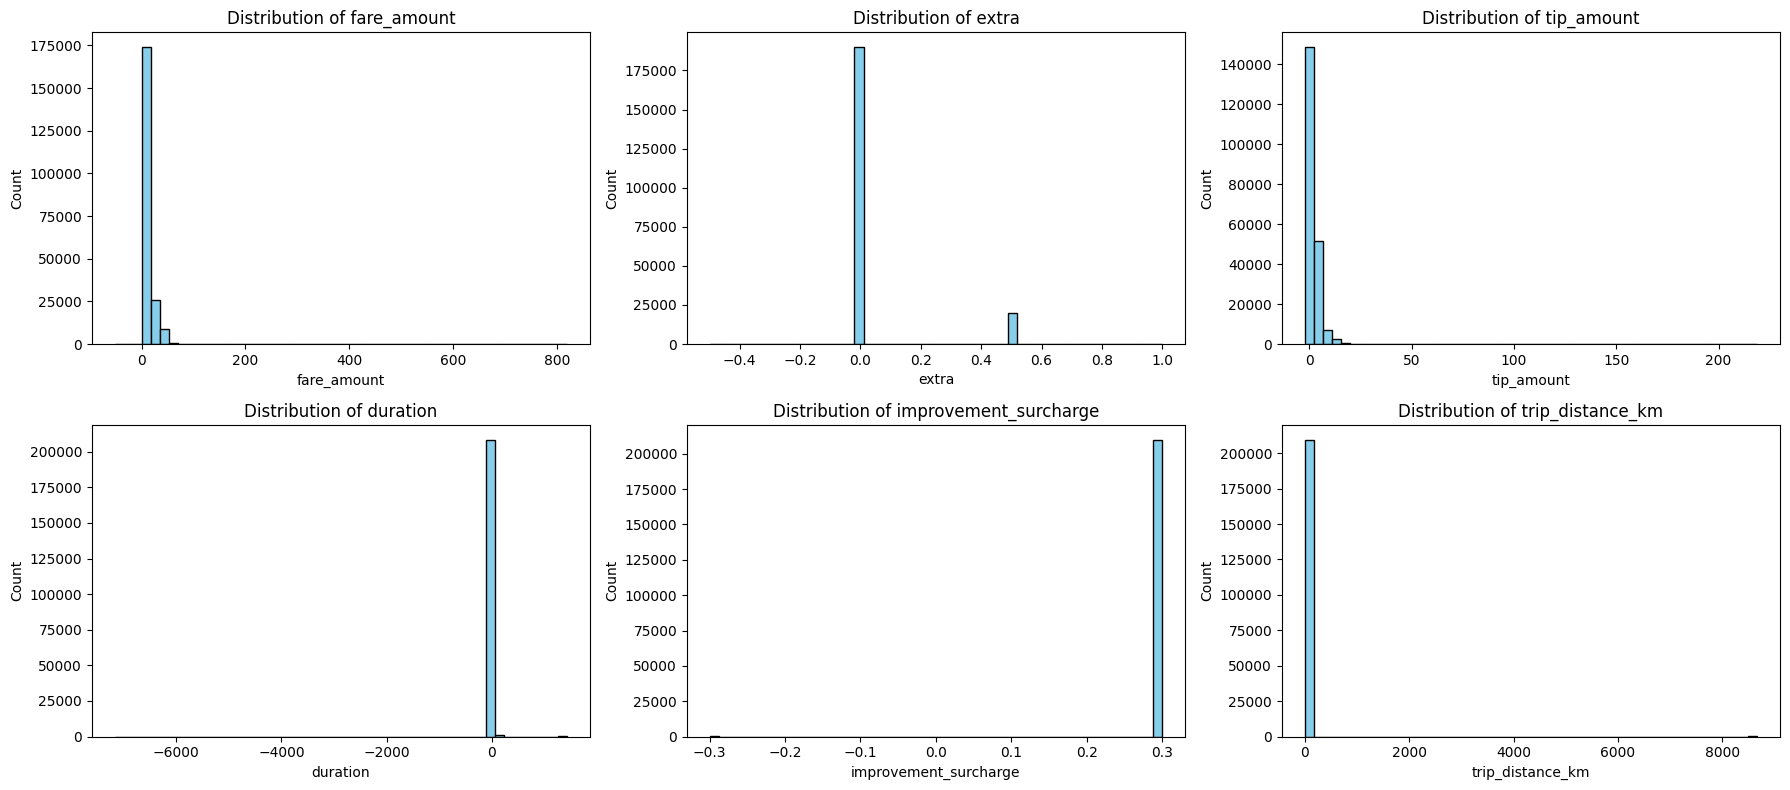

In [149]:
import matplotlib.pyplot as plt

continuous_cols =  ['fare_amount','extra', 'tip_amount','duration','improvement_surcharge','trip_distance_km' ]

# Plot settings
n_cols = 3
n_rows = (len(continuous_cols) + n_cols - 1) // n_cols
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, n_rows * 4))
axes = axes.flatten()

# Plot each histogram
for i, col in enumerate(continuous_cols):
    axes[i].hist(df[col], bins=50, color='skyblue', edgecolor='black')
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')

# Hide extra axes
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()


In [150]:
df.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude', 'RatecodeID',
       'store_and_fwd_flag', 'dropoff_longitude', 'dropoff_latitude',
       'payment_type', 'fare_amount', 'extra', 'mta_tax', 'tip_amount',
       'tolls_amount', 'improvement_surcharge', 'total_amount', 'pickup_area',
       'dropoff_area', 'Day', 'Month', 'duration', 'day_of_week', 'hour',
       'am/pm', 'is_late_night', 'trip_distance_km'],
      dtype='object')

### Bivariate Analysis

In [151]:
df.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude', 'RatecodeID',
       'store_and_fwd_flag', 'dropoff_longitude', 'dropoff_latitude',
       'payment_type', 'fare_amount', 'extra', 'mta_tax', 'tip_amount',
       'tolls_amount', 'improvement_surcharge', 'total_amount', 'pickup_area',
       'dropoff_area', 'Day', 'Month', 'duration', 'day_of_week', 'hour',
       'am/pm', 'is_late_night', 'trip_distance_km'],
      dtype='object')

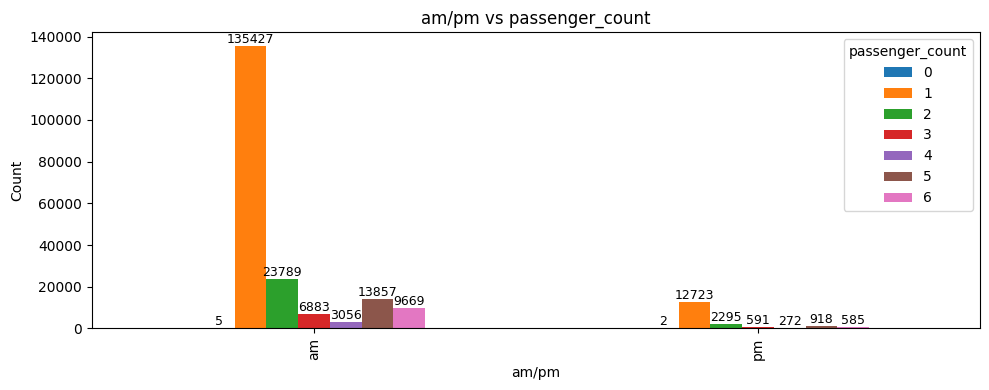

In [152]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create cross-tabulation between am/pm vs passenger_count
cross_tab = pd.crosstab(df['am/pm'], df['passenger_count'])

# Plot
ax = cross_tab.plot(kind='bar', figsize=(10, 4))
plt.title('am/pm vs passenger_count')
plt.xlabel('am/pm')
plt.ylabel('Count')
plt.legend(title='passenger_count')

# Annotate bars
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=9)

plt.tight_layout()
plt.show()


In [153]:
#no of passengers across am/pm and is_late_night
pd.pivot_table(
    df,
    index='am/pm',
    columns='is_late_night',
    values='passenger_count',
    aggfunc='sum'
)
#Inference : we see that in the am (early morning) and in the late night we highest no of passengers

is_late_night,0,1
am/pm,,
am,115622,227555
pm,22072,6202


In [154]:
cross_tab = pd.crosstab(df['passenger_count'],df['is_late_night'])
cross_tab
#Inference : there are more single passengers in the late night

is_late_night,0,1
passenger_count,,
0,2,5
1,50497,97653
2,10222,15862
3,2937,4537
4,1350,1978
5,5742,9033
6,3972,6282


In [155]:
cross_tab = pd.crosstab(df['store_and_fwd_flag'],df['is_late_night'])
cross_tab

is_late_night,0,1
store_and_fwd_flag,,
N,74549,134878
Y,173,472


In [156]:
cross_tab = pd.crosstab(df['RatecodeID'],df['payment_type'])
cross_tab
#Inference : RatecodeID 1 and the paymentype 1 has the most no of passengers

payment_type,1,2,3,4
RatecodeID,,,,
1,139185,65659,382,172
2,2851,943,18,1
3,337,83,10,4
4,50,37,1,0
5,262,62,9,1
6,0,0,1,0
99,3,1,0,0


In [157]:
# there cant be passenger_count be 0, can be considered as logical outliers, hence can be removed
df = df[df['passenger_count'] != 0]

In [158]:
pivot = df.pivot_table(index='is_late_night', values='fare_amount', aggfunc='mean')
pivot
#Inference : the late night has low fare compared in the other time of the day

,fare_amount
is_late_night,
0,13.340015
1,12.245935


In [159]:
df.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude', 'RatecodeID',
       'store_and_fwd_flag', 'dropoff_longitude', 'dropoff_latitude',
       'payment_type', 'fare_amount', 'extra', 'mta_tax', 'tip_amount',
       'tolls_amount', 'improvement_surcharge', 'total_amount', 'pickup_area',
       'dropoff_area', 'Day', 'Month', 'duration', 'day_of_week', 'hour',
       'am/pm', 'is_late_night', 'trip_distance_km'],
      dtype='object')

In [160]:
df['other_charges']=df['extra']+df['mta_tax']+df['improvement_surcharge']+df['tip_amount']+df['tolls_amount']

In [161]:
#Average percentage of othercharges w.r.t the base fare charged:

df['other_charges'].sum()/df['total_amount'].sum()*100

#Inference : we infer 19% on an average other charges is being charged on the whole

np.float64(19.092474387563342)

In [162]:
pivot = df.pivot_table(
    index='is_late_night',
    values=['total_amount','other_charges','extra'],
    aggfunc='mean'
)

pivot

,extra,other_charges,total_amount
is_late_night,,,
0,0.088919,3.080131,16.420135
1,0.025501,2.927227,15.173150


In [163]:
pivot = df.pivot_table(
    index='am/pm',
    values=['total_amount','other_charges','extra'],
    aggfunc='mean'
)

pivot

#Inference : the total fare in the pm is high than in the am

,extra,other_charges,total_amount
am/pm,,,
am,0.008654,2.956159,15.475282
pm,0.484814,3.263766,17.184175


In [164]:

pivot = df.pivot_table(
    index='RatecodeID',
    values=['total_amount','other_charges','extra'],
    aggfunc='mean'
)

pivot

#RatecodeID 3 has the highest mean total fare and RatecodeID 6,99 has the lowest total fare

,extra,other_charges,total_amount
RatecodeID,,,
1,0.048981,2.731744,14.424365
2,0.000000,13.085597,65.030391
3,0.062212,24.927696,89.750276
4,0.090909,8.794886,82.948295
5,0.000000,11.359576,71.418939
6,0.000000,0.800000,3.300000
99,0.000000,0.800000,3.300000


In [165]:

pivot = df.pivot_table(
    index='passenger_count',
    values=['total_amount','other_charges','extra'],
    aggfunc='mean'
)

pivot

#Inference : the passenger count 2 has the highest mean total fare amount

,extra,other_charges,total_amount
passenger_count,,,
1,0.050466,2.965837,15.483493
2,0.047980,3.063051,16.233238
3,0.044421,2.970698,15.802333
4,0.046124,2.833978,15.485871
5,0.034924,3.061180,15.922805
6,0.035693,2.943644,15.439061


## Outliers Handling

In [166]:
df.describe()

,VendorID,passenger_count,pickup_longitude,pickup_latitude,RatecodeID,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,...,improvement_surcharge,total_amount,Day,Month,duration,day_of_week,hour,is_late_night,trip_distance_km,other_charges
count,210065.000000,210065.000000,210065.000000,210065.000000,210065.000000,210065.000000,210065.000000,210065.000000,210065.000000,210065.000000,...,210065.000000,210065.000000,210065.000000,210065.000000,210065.000000,210065.000000,210065.000000,210065.000000,210065.000000,210065.000000
mean,1.709947,1.768267,-73.865227,40.694667,1.030314,-73.896216,40.710315,1.324466,12.635099,0.048059,...,0.299657,15.616702,6.793845,2.917245,16.163327,1.689844,5.722305,0.644301,24.851591,2.981615
std,0.453788,1.471242,2.815964,1.549463,0.316608,2.392947,1.318491,0.477788,10.693555,0.147796,...,0.013788,13.415693,7.912149,0.275513,56.169450,1.073347,4.873521,0.478726,432.197399,3.726052
min,1.000000,1.000000,-74.184555,0.000000,1.000000,-74.640816,0.000000,1.000000,-52.000000,-0.500000,...,-0.300000,-52.800000,1.000000,2.000000,-7174.580000,0.000000,0.000000,0.000000,0.000000,-3.140000
25%,1.000000,1.000000,-73.990982,40.740952,1.000000,-73.990692,40.740719,1.000000,6.500000,0.000000,...,0.300000,8.300000,1.000000,3.000000,6.730000,1.000000,3.000000,0.000000,1.180000,0.800000
50%,2.000000,1.000000,-73.979736,40.756130,1.000000,-73.978867,40.755714,1.000000,9.500000,0.000000,...,0.300000,11.620000,1.000000,3.000000,11.280000,1.000000,4.000000,1.000000,1.960000,2.260000
75%,2.000000,2.000000,-73.963921,40.770458,1.000000,-73.965591,40.767689,2.000000,14.500000,0.000000,...,0.300000,17.160000,10.000000,3.000000,18.320000,3.000000,6.000000,1.000000,3.600000,3.300000
max,2.000000,6.000000,0.000000,42.786934,99.000000,0.000000,42.666893,4.000000,819.500000,1.000000,...,0.300000,832.800000,29.000000,3.000000,1439.380000,3.000000,23.000000,1.000000,8667.950000,661.880000


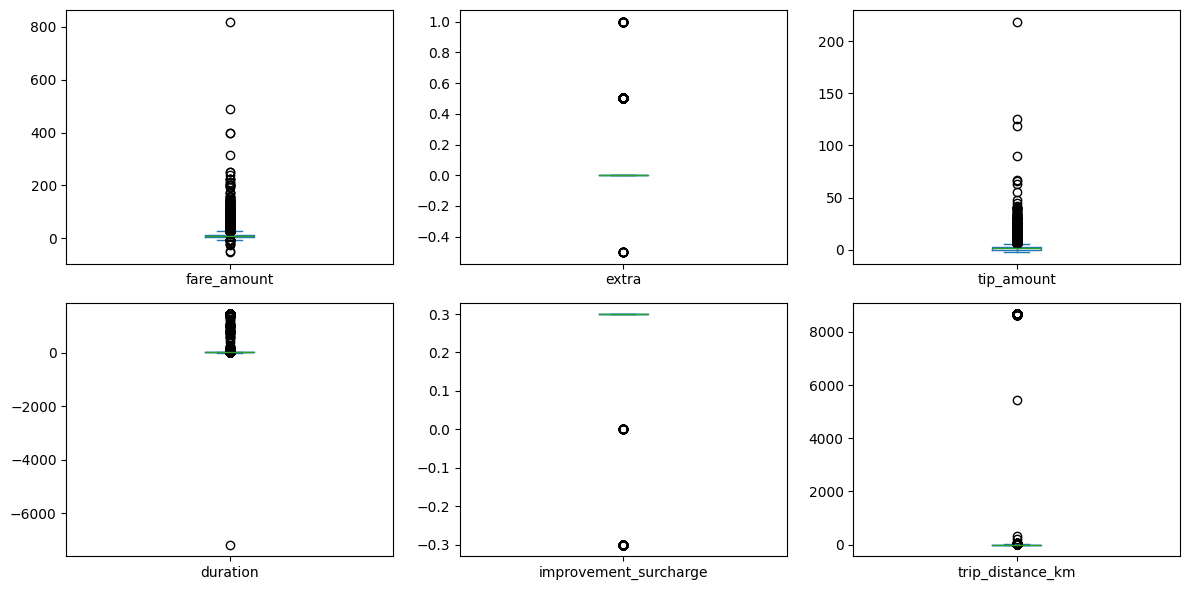

In [167]:
continuous_cols = [
    'fare_amount', 'extra', 'tip_amount', 'duration',
    'improvement_surcharge', 'trip_distance_km'
]

df[continuous_cols].plot(kind='box', subplots=True, layout=(2, 3), figsize=(12, 6))
plt.tight_layout()
plt.show()

#Inference : We can see extreme outliers in these columns from the boxplots

In [168]:
df.describe()

,VendorID,passenger_count,pickup_longitude,pickup_latitude,RatecodeID,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,...,improvement_surcharge,total_amount,Day,Month,duration,day_of_week,hour,is_late_night,trip_distance_km,other_charges
count,210065.000000,210065.000000,210065.000000,210065.000000,210065.000000,210065.000000,210065.000000,210065.000000,210065.000000,210065.000000,...,210065.000000,210065.000000,210065.000000,210065.000000,210065.000000,210065.000000,210065.000000,210065.000000,210065.000000,210065.000000
mean,1.709947,1.768267,-73.865227,40.694667,1.030314,-73.896216,40.710315,1.324466,12.635099,0.048059,...,0.299657,15.616702,6.793845,2.917245,16.163327,1.689844,5.722305,0.644301,24.851591,2.981615
std,0.453788,1.471242,2.815964,1.549463,0.316608,2.392947,1.318491,0.477788,10.693555,0.147796,...,0.013788,13.415693,7.912149,0.275513,56.169450,1.073347,4.873521,0.478726,432.197399,3.726052
min,1.000000,1.000000,-74.184555,0.000000,1.000000,-74.640816,0.000000,1.000000,-52.000000,-0.500000,...,-0.300000,-52.800000,1.000000,2.000000,-7174.580000,0.000000,0.000000,0.000000,0.000000,-3.140000
25%,1.000000,1.000000,-73.990982,40.740952,1.000000,-73.990692,40.740719,1.000000,6.500000,0.000000,...,0.300000,8.300000,1.000000,3.000000,6.730000,1.000000,3.000000,0.000000,1.180000,0.800000
50%,2.000000,1.000000,-73.979736,40.756130,1.000000,-73.978867,40.755714,1.000000,9.500000,0.000000,...,0.300000,11.620000,1.000000,3.000000,11.280000,1.000000,4.000000,1.000000,1.960000,2.260000
75%,2.000000,2.000000,-73.963921,40.770458,1.000000,-73.965591,40.767689,2.000000,14.500000,0.000000,...,0.300000,17.160000,10.000000,3.000000,18.320000,3.000000,6.000000,1.000000,3.600000,3.300000
max,2.000000,6.000000,0.000000,42.786934,99.000000,0.000000,42.666893,4.000000,819.500000,1.000000,...,0.300000,832.800000,29.000000,3.000000,1439.380000,3.000000,23.000000,1.000000,8667.950000,661.880000


In [169]:
#Handling the oultiers using IQR method

# Continuous columns
continuous_cols = [
    'fare_amount', 'extra', 'tip_amount', 'duration',
    'improvement_surcharge', 'trip_distance_km'
]

df_iqr = df.copy()

for col in continuous_cols:
    Q1 = df_iqr[col].quantile(0.25)
    Q3 = df_iqr[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Keep only non-outlier rows for this column
    df= df_iqr[(df_iqr[col] >= lower_bound) & (df_iqr[col] <= upper_bound)]



In [170]:
df=df[df['total_amount']<200] #outlier in total_amount

In [171]:
continuous_cols = [
    'fare_amount',
    'extra',
    'mta_tax',
    'tolls_amount',
    'improvement_surcharge',
    'total_amount',
    'duration',
    'tip_amount',
    'trip_distance_km'
]

In [172]:
(df[continuous_cols] < 0).sum()
#check for negative values

,0
fare_amount,95
extra,18
mta_tax,90
tolls_amount,0
improvement_surcharge,95
total_amount,95
duration,0
tip_amount,3
trip_distance_km,0


In [173]:
for col in continuous_cols:
    if col in ['tip_amount', 'duration', 'trip_distance_km']:  #these cols are replaced by zerp while others with median
        df[col] = df[col].apply(lambda x: 0 if x < 0 else x)
    else:
        median_val = df[col].median()
        df[col] = df[col].apply(lambda x: median_val if x < 0 else x)


## Other Insights

### Demographics of data

In [174]:
df['is_peak_time'] = df['hour'].apply(lambda x: 1 if x >= 2 and x <=6 else 0 )


In [175]:
df['trip_length'] = df['trip_distance_km'].apply(lambda x : 'short' if x <1 else ('mid' if x < 4  else 'long'))

In [176]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# ---------- Data Prep ----------

# 1. Total amount share by am/pm - bar
total_by_ampm = df.groupby('am/pm')['total_amount'].sum()

# 2. Total amount share by payment_type - bar
total_by_payment = df.groupby('payment_type')['total_amount'].sum()

# 3. Fare components share in total_amount - donut
fare_components = ['fare_amount', 'extra', 'mta_tax', 'tip_amount',
                   'tolls_amount', 'improvement_surcharge']
components_sum = df[fare_components].sum()

# 4. Trip distance share by is_peak_time - donut
distance_by_peak = df.groupby('is_peak_time')['trip_distance_km'].sum()

# 5. Passenger count by trip_length - bar
passenger_by_length = df.groupby('trip_length')['passenger_count'].sum()

# 6. Trip count by passenger_count - bar
trip_count_by_passenger = df['passenger_count'].value_counts()

# ---------- Subplots Setup ----------
fig = make_subplots(
    rows=2, cols=3,
    subplot_titles=[
        "Total Amount by AM/PM",
        "Total Amount by Payment Type",
        "Fare Components Share",
        "Trip Distance Share by Peak Time",
        "Passenger Count by Trip Length",
        "Trip Count by Passenger Count"
    ],
    specs=[[{"type": "bar"}, {"type": "bar"}, {"type": "domain"}],
           [{"type": "domain"}, {"type": "bar"}, {"type": "bar"}]]
)

# ---------- Add Traces ----------

# 1. Total amount share by am/pm - bar
fig.add_trace(
    go.Bar(x=total_by_ampm.index, y=total_by_ampm.values, text=total_by_ampm.values, textposition='auto'),
    row=1, col=1
)

# 2. Total amount share by payment_type - bar
fig.add_trace(
    go.Bar(x=total_by_payment.index, y=total_by_payment.values, text=total_by_payment.values, textposition='auto'),
    row=1, col=2
)

# 3. Fare components share - donut
fig.add_trace(
    go.Pie(labels=components_sum.index, values=components_sum.values, hole=0.4, textinfo='percent'),
    row=1, col=3
)

# 4. Trip distance share by is_peak_time - donut
fig.add_trace(
    go.Pie(labels=distance_by_peak.index, values=distance_by_peak.values, hole=0.4, textinfo='percent'),
    row=2, col=1
)

# 5. Passenger count by trip_length - bar
fig.add_trace(
    go.Bar(x=passenger_by_length.index, y=passenger_by_length.values, text=passenger_by_length.values, textposition='auto'),
    row=2, col=2
)

# 6. Trip count by passenger_count - bar
fig.add_trace(
    go.Bar(x=trip_count_by_passenger.index, y=trip_count_by_passenger.values, text=trip_count_by_passenger.values, textposition='auto'),
    row=2, col=3
)

# ---------- Layout ----------
fig.update_layout(
    height=800, width=1100,
    title_text="Taxi Trip Metrics Dashboard",
    showlegend=False

)

fig.show()


### Exploring how fare per km and fare per minute behave across different time periods or trip lengths.

In [177]:
# fare_per_km column for each trip
df['fare_per_km'] = df['total_amount'] / df['trip_distance_km']


In [178]:
df[['total_amount','trip_distance_km','fare_per_km']]

,total_amount,trip_distance_km,fare_per_km
0,12.35,3.14,3.933121
1,15.35,4.30,3.569767
5,30.36,6.50,4.670769
8,8.80,0.84,10.476190
9,28.00,7.12,3.932584
...,...,...,...
212339,23.15,5.78,4.005190
212340,20.16,3.81,5.291339
212341,18.30,3.50,5.228571
212342,4.80,0.58,8.275862


In [179]:
# Pivot table: mean fare/km for each group
pivot = pd.pivot_table(
    data=df,
    index='trip_length',
    columns='am/pm',
    values='fare_per_km',
    aggfunc='mean'
)

pivot

am/pm,am,pm
trip_length,,
long,4.223412,3.569614
mid,6.177445,5.145917
short,inf,inf


In [180]:
pd.pivot_table( data=df, index='trip_length', columns='am/pm', values='trip_distance_km', aggfunc='mean')

#Inference : Long trip distances are covered in am than pm

am/pm,am,pm
trip_length,,
long,5.240845,5.413172
mid,2.040290,2.239821
short,0.695499,0.625698


In [181]:
df['trip_length'].value_counts()

#there are more mid length trips between 1 and 4 kms

,count
trip_length,
mid,125922
short,37904
long,25003


In [182]:
pd.crosstab(df['trip_length'], df['am/pm'], margins=True)

#Inference : More midlength trips(1-4km) in the am(mornings)

am/pm,am,pm,All
trip_length,,,
long,21346,3657,25003
mid,117855,8067,125922
short,35582,2322,37904
All,174783,14046,188829


### Visualizing trip counts by pickup hour and pickup day to identify peak demand periods.

In [183]:
# flag Peak time
df['hour'].value_counts().reset_index().sort_values(by='hour',ascending=True)

# we see that hour 2 - 6 is the peak time >25K+ datarows

,hour,count
11,0,2919
6,1,8992
2,2,25579
0,3,30588
1,4,27843
3,5,23889
4,6,23881
5,7,13602
7,8,8913
8,9,8577


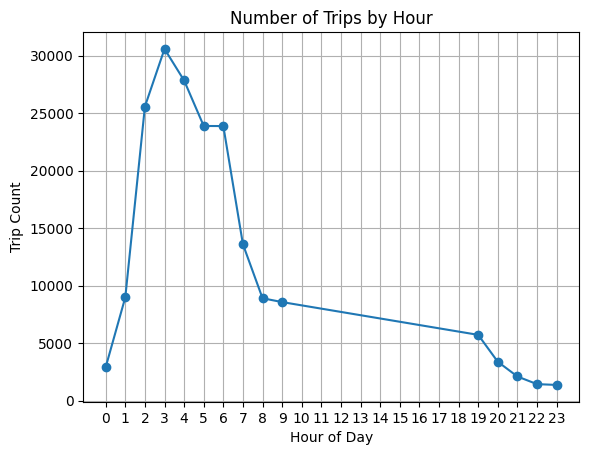

In [184]:
import matplotlib.pyplot as plt

# Get counts per hour
hour_counts = df['hour'].value_counts().reset_index()
hour_counts.columns = ['hour', 'count']  # rename columns
hour_counts = hour_counts.sort_values(by='hour', ascending=True)

# Line plot
plt.plot(hour_counts['hour'], hour_counts['count'], marker='o')
plt.title('Number of Trips by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Trip Count')
plt.xticks(range(0, 24))  # ensure all hours 0-23 are shown
plt.grid(True)
plt.show()

#Inference : More trips around 2-6 am in the morning

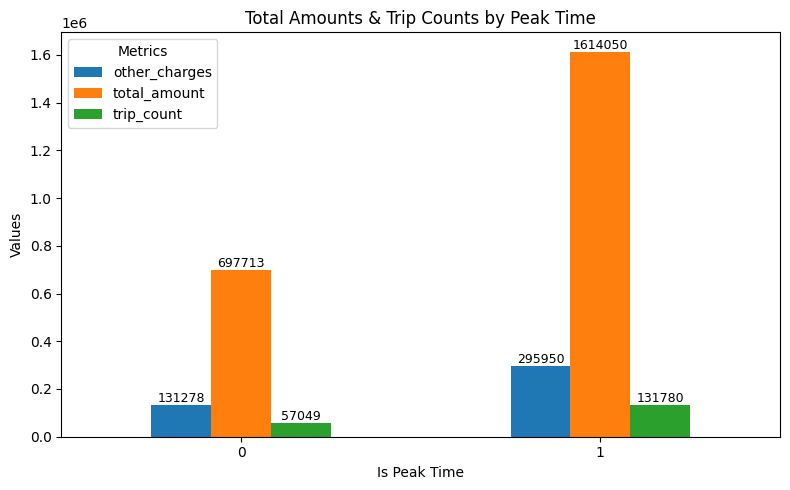

In [185]:
import matplotlib.pyplot as plt

# Your pivot table
pivot = df.pivot_table(
    index='is_peak_time',
    values=['total_amount', 'other_charges'],
    aggfunc='sum'
)
trip_counts = df.groupby('is_peak_time').size().rename('trip_count')
pivot = pivot.join(trip_counts)

# Plot
ax = pivot.plot(kind='bar', figsize=(8, 5))
plt.title('Total Amounts & Trip Counts by Peak Time')
plt.xlabel('Is Peak Time')
plt.ylabel('Values')
plt.xticks(rotation=0)
plt.legend(title='Metrics')

# Add value labels on bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', label_type='edge', fontsize=9)

plt.tight_layout()
plt.show()


#Peak time has the highest trips and Revenue generated

In [186]:
df.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude', 'RatecodeID',
       'store_and_fwd_flag', 'dropoff_longitude', 'dropoff_latitude',
       'payment_type', 'fare_amount', 'extra', 'mta_tax', 'tip_amount',
       'tolls_amount', 'improvement_surcharge', 'total_amount', 'pickup_area',
       'dropoff_area', 'Day', 'Month', 'duration', 'day_of_week', 'hour',
       'am/pm', 'is_late_night', 'trip_distance_km', 'other_charges',
       'is_peak_time', 'trip_length', 'fare_per_km'],
      dtype='object')

In [187]:
df['pickup_area'].nunique(),df['dropoff_area'].nunique()

(166, 186)

In [188]:
# Get unique pickup and dropoff areas as Python sets
Pickup_Areas = set(df['pickup_area'].unique())
Dropoff_Areas = set(df['dropoff_area'].unique())

# Union of both sets
Areas = Pickup_Areas.union(Dropoff_Areas)

# Number of unique areas
len(Areas)
# Inference : there are 229 areas in total

194

In [189]:
df[['dropoff_area','total_amount']].groupby('dropoff_area').mean().sort_values(by='total_amount',ascending=False).head()

#Annadale-Huguenot-Prince's Bay-Woodrow area has the highest drop-off total amount mean.

,total_amount
dropoff_area,
Bay Terrace-Clearview,60.360000
Pelham Parkway-Van Nest,40.300000
Rockaway Beach-Arverne-Edgemere,40.240000
Breezy Point-Belle Harbor-Rockaway Park-Broad Channel,34.800000
Auburndale,33.203333


In [190]:
df[['pickup_area','total_amount']].groupby('pickup_area').mean().sort_values(by='total_amount',ascending=False).head()

#South Ozone Park area has the highest pickup area total amount mean.

,total_amount
pickup_area,
Randall's Island,61.887778
Marine Park-Mill Basin-Bergen Beach,42.800000
Rosedale,41.800000
Highbridge Park,41.160000
East Flatbush-Rugby,36.300000


In [191]:
df['pickup_area'].value_counts().sort_values(ascending=False).head()
# The highest pickup trips is made at Midtown-Times Square area

,count
pickup_area,
Midtown-Times Square,24690
Upper East Side-Carnegie Hill,18279
Midtown South-Flatiron-Union Square,17496
East Midtown-Turtle Bay,12203
Chelsea-Hudson Yards,10526


In [192]:
df['dropoff_area'].value_counts().sort_values(ascending=False).head()
# The highest dropoff trips is made at Midtown-Times Square area
#We see that the  Midtown-Times Square area one of the famous hotspots in that region

,count
dropoff_area,
Midtown-Times Square,36168
Upper East Side-Carnegie Hill,16625
Midtown South-Flatiron-Union Square,16432
East Midtown-Turtle Bay,14121
Chelsea-Hudson Yards,10383


In [193]:
df.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude', 'RatecodeID',
       'store_and_fwd_flag', 'dropoff_longitude', 'dropoff_latitude',
       'payment_type', 'fare_amount', 'extra', 'mta_tax', 'tip_amount',
       'tolls_amount', 'improvement_surcharge', 'total_amount', 'pickup_area',
       'dropoff_area', 'Day', 'Month', 'duration', 'day_of_week', 'hour',
       'am/pm', 'is_late_night', 'trip_distance_km', 'other_charges',
       'is_peak_time', 'trip_length', 'fare_per_km'],
      dtype='object')

In [194]:
import folium

# Step 1: Compute trip counts directly by coordinates
top_10_coords = (
    df.groupby(['dropoff_latitude', 'dropoff_longitude'])
      .size()
      .reset_index(name='trip_count')
      .nlargest(10, 'trip_count')
)

# Step 2: Create map centered on mean of hotspots
m = folium.Map(
    location=[top_10_coords['dropoff_latitude'].mean(), top_10_coords['dropoff_longitude'].mean()],
    zoom_start=12
)

# Step 3: Add markers
for _, row in top_10_coords.iterrows():
    folium.Marker(
        location=[row['dropoff_latitude'], row['dropoff_longitude']],
        popup=f"Trips: {row['trip_count']}",
        icon=folium.Icon(color="red", icon="map-marker", prefix="fa")
    ).add_to(m)

# Step 4: Display map inline in Colab
m


In [195]:
import pandas as pd
import plotly.graph_objects as go

# Step 1: Filter for late night, single passenger, long trips
df_pm = df[
    (df['is_late_night'] == 1) &
    (df['passenger_count'] == 1) &
    (df['trip_length'] == 'long')
]

# Step 2: Group by drop-off coordinates and count trips
df_trip_counts = (
    df_pm.groupby(['dropoff_latitude', 'dropoff_longitude', 'dropoff_area'])
         .size()
         .reset_index(name='trip_count')
)

# Step 3: Select Top 10 hotspots
top_10_hotspots = df_trip_counts.nlargest(10, 'trip_count')

# Step 4: Create Scattermapbox for only top 10
fig = go.Figure(go.Scattermapbox(
    lat=top_10_hotspots['dropoff_latitude'],
    lon=top_10_hotspots['dropoff_longitude'],
    mode='markers+text',
    marker=go.scattermapbox.Marker(
        size=15,
        color='red'  # fixed red color
    ),
    text=[str(i+1) for i in range(len(top_10_hotspots))],  # Only rank number
    textposition="top center",
    hovertemplate=(
        'Rank: %{text}<br>' +
        'Area: %{customdata}<extra></extra>'
    ),
    customdata=top_10_hotspots['dropoff_area']
))

# Step 5: Mapbox layout
fig.update_layout(
    mapbox=dict(
        style='open-street-map',
        center=dict(
            lat=top_10_hotspots['dropoff_latitude'].mean(),
            lon=top_10_hotspots['dropoff_longitude'].mean()
        ),
        zoom=9
    ),
    margin=dict(l=0, r=0, t=40, b=0),
    title="Top 10 Late Night Long Trip Hotspots (1 Passenger)"
)

fig.show()


## Handling Skewness

In [196]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 188829 entries, 0 to 212343
Data columns (total 32 columns):
 #   Column                 Non-Null Count   Dtype                     
---  ------                 --------------   -----                     
 0   VendorID               188829 non-null  int64                     
 1   tpep_pickup_datetime   188829 non-null  datetime64[ns, US/Eastern]
 2   tpep_dropoff_datetime  188829 non-null  datetime64[ns, US/Eastern]
 3   passenger_count        188829 non-null  int64                     
 4   pickup_longitude       188829 non-null  float64                   
 5   pickup_latitude        188829 non-null  float64                   
 6   RatecodeID             188829 non-null  int64                     
 7   store_and_fwd_flag     188829 non-null  object                    
 8   dropoff_longitude      188829 non-null  float64                   
 9   dropoff_latitude       188829 non-null  float64                   
 10  payment_type           18

In [197]:
cols = [
    'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount',
    'improvement_surcharge', 'total_amount', 'duration',
    'trip_distance_km']


In [198]:
for i in cols:
  print(i,df[i].skew())

fare_amount 2.399691251200938
extra 2.917351457822791
mta_tax -30.99079803833819
tip_amount 8.330225795837945
tolls_amount 16.978437921536223
improvement_surcharge -86.89234768635485
total_amount 2.6108386861044806
duration 25.819526810275487
trip_distance_km 1.2140573263124002


In [199]:
for i in cols:
  print(i,df[i].kurtosis())

fare_amount 18.619035211330512
extra 6.607106408898654
mta_tax 958.4397144567573
tip_amount 493.23749565262915
tolls_amount 352.2168511557751
improvement_surcharge 7548.3600356070065
total_amount 20.640805532388182
duration 681.4241833709141
trip_distance_km 0.9809711055540697


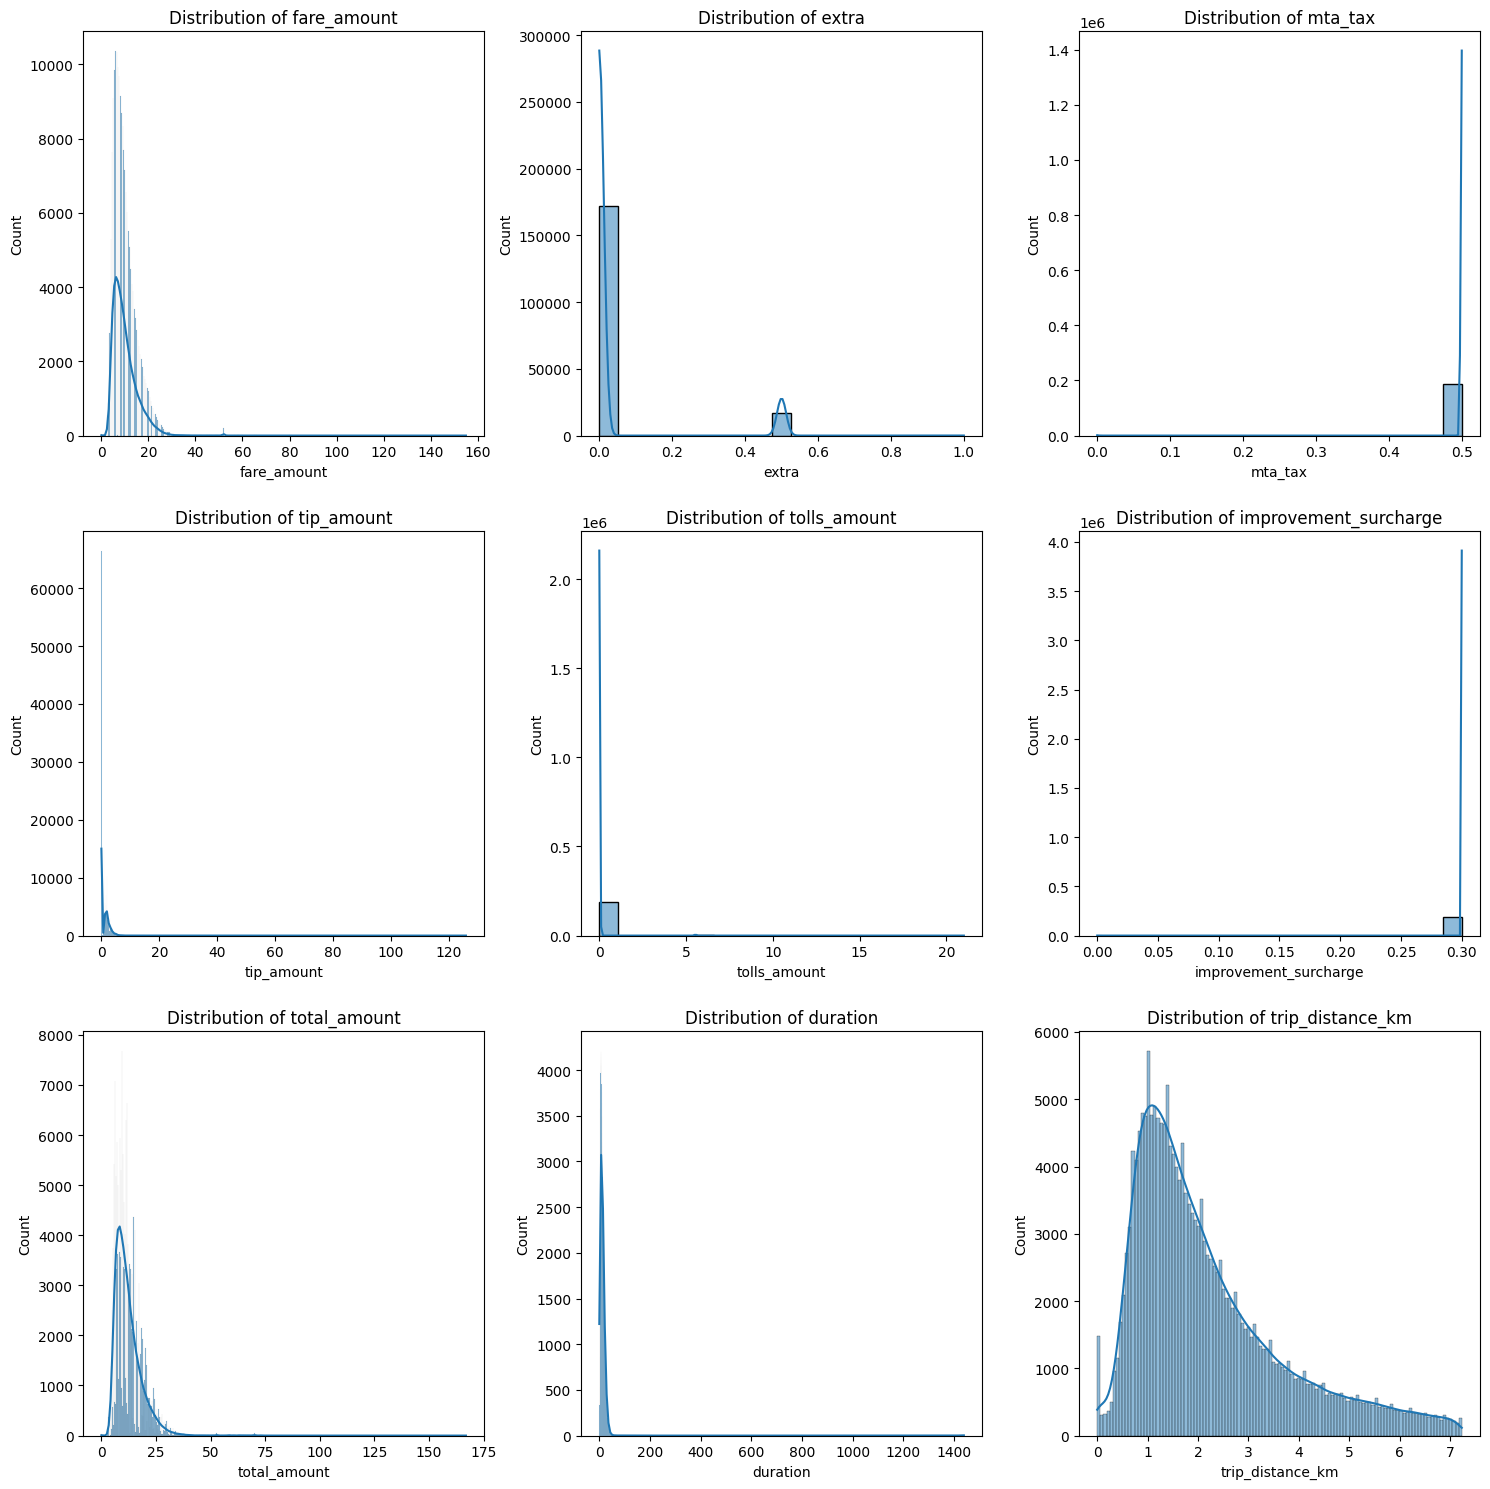

In [200]:
import matplotlib.pyplot as plt
import seaborn as sns

cols = [
    'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount',
    'improvement_surcharge', 'total_amount', 'duration',
    'trip_distance_km'
]

n_cols = 3  # 3 plots per row
n_rows = (len(cols) + n_cols - 1) // n_cols  # calculate rows needed

plt.figure(figsize=(15, 5 * n_rows))  # width, height depends on rows

for i, col in enumerate(cols):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.histplot(df[col], kde=True)  # distplot deprecated, use histplot + kde
    plt.title(f'Distribution of {col}')

plt.tight_layout()
plt.show()


In [201]:
## FIND OPTIMAL LAMBDA TO FIX SKEWNESS AND KURTOSIS:
from scipy.stats import boxcox

for i in cols:
  if df[i].skew() < 0.5 and df[i].skew() > -0.5 and df[i].kurtosis() < 3 and df[i].kurtosis() > -3:
    continue
  print(i)
  method = [0,0.5,-0.5,-1,1,2,-2]
  for j in method:
    print(j)
    print("skewness",pd.DataFrame(boxcox(df[i],lmbda=j)).skew().values,"Kurtosis",pd.DataFrame(boxcox(df[i],lmbda=j)).kurtosis().values)
  print("---------------------------------")

fare_amount
0
skewness [nan] Kurtosis [nan]
0.5
skewness [0.91572767] Kurtosis [2.11935]
-0.5
skewness [nan] Kurtosis [nan]
-1
skewness [nan] Kurtosis [nan]
1
skewness [2.39969125] Kurtosis [18.61903521]
2
skewness [25.24859918] Kurtosis [1879.50735459]
-2
skewness [nan] Kurtosis [nan]
---------------------------------
extra
0
skewness [nan] Kurtosis [nan]
0.5
skewness [2.90244129] Kurtosis [6.43257004]
-0.5
skewness [nan] Kurtosis [nan]
-1
skewness [nan] Kurtosis [nan]
1
skewness [2.91735146] Kurtosis [6.60710641]
2
skewness [3.16890559] Kurtosis [11.27500901]
-2
skewness [nan] Kurtosis [nan]
---------------------------------
mta_tax
0
skewness [nan] Kurtosis [nan]
0.5
skewness [-30.99079804] Kurtosis [958.43971446]
-0.5
skewness [nan] Kurtosis [nan]
-1
skewness [nan] Kurtosis [nan]
1
skewness [-30.99079804] Kurtosis [958.43971446]
2
skewness [-30.99079804] Kurtosis [958.43971446]
-2
skewness [nan] Kurtosis [nan]
---------------------------------
tip_amount
0
skewness [nan] Kurtosis [

In [202]:
# # From the above results we have found the optimal Lambda for these cols

# 'fare_amount' - lambda -> 0.5
# 'extra' - lambda -> 0.5
# 'mta_tax' - lambda -> 0.5
# 'tip_amount' - lambda -> 1
# 'tolls_amount'- lambda -> 0.5
# 'improvement_surcharge' -lambda
# 'total_amount'- lambda -> 0.5
# 'duration' - lambda -> 0.5
# 'trip_distance_km' - lambda -> 0

In [203]:
import numpy as np
import pandas as pd
from scipy.stats import boxcox

cols_to_transform = [
    'fare_amount',
    'extra',
    'mta_tax',
    'tolls_amount',
    'improvement_surcharge',
    'total_amount',
    'duration',
    'tip_amount',
    'trip_distance_km'
]

df_transformed = df.copy()
best_lambdas = {}
shifts = {}   # keep track of applied shifts

for col in cols_to_transform:
    values = df[col].values

    # If column has zeros (or negatives, just in case), shift to > 0
    if (values <= 0).any():
        shift = abs(values.min()) + 1e-6
        shifts[col] = shift
        print(f"⚠️ Column '{col}' shifted by {shift:.6f} to make strictly positive.")
        values = values + shift
    else:
        shifts[col] = 0.0

    # Apply Box-Cox
    transformed, lmbda = boxcox(values)
    df_transformed[col] = transformed
    best_lambdas[col] = lmbda

print("\n✅ Box-Cox transformation complete!")
print("Best λ values:", best_lambdas)
print("Applied shifts:", shifts)


⚠️ Column 'fare_amount' shifted by 0.000001 to make strictly positive.
⚠️ Column 'extra' shifted by 0.000001 to make strictly positive.
⚠️ Column 'mta_tax' shifted by 0.000001 to make strictly positive.
⚠️ Column 'tolls_amount' shifted by 0.000001 to make strictly positive.
⚠️ Column 'improvement_surcharge' shifted by 0.000001 to make strictly positive.
⚠️ Column 'total_amount' shifted by 0.000001 to make strictly positive.
⚠️ Column 'duration' shifted by 0.000001 to make strictly positive.
⚠️ Column 'tip_amount' shifted by 0.000001 to make strictly positive.
⚠️ Column 'trip_distance_km' shifted by 0.000001 to make strictly positive.

✅ Box-Cox transformation complete!
Best λ values: {'fare_amount': np.float64(0.17372795069121535), 'extra': np.float64(-0.861983508543325), 'mta_tax': np.float64(73.41765616764167), 'tolls_amount': np.float64(-13.0226137185356), 'improvement_surcharge': np.float64(598.9085954427487), 'total_amount': np.float64(0.15890943057968343), 'duration': np.float64(

In [204]:
(df[cols_to_transform] <= 0).sum()


,0
fare_amount,30
extra,172139
mta_tax,196
tolls_amount,187898
improvement_surcharge,25
total_amount,24
duration,9
tip_amount,66404
trip_distance_km,948


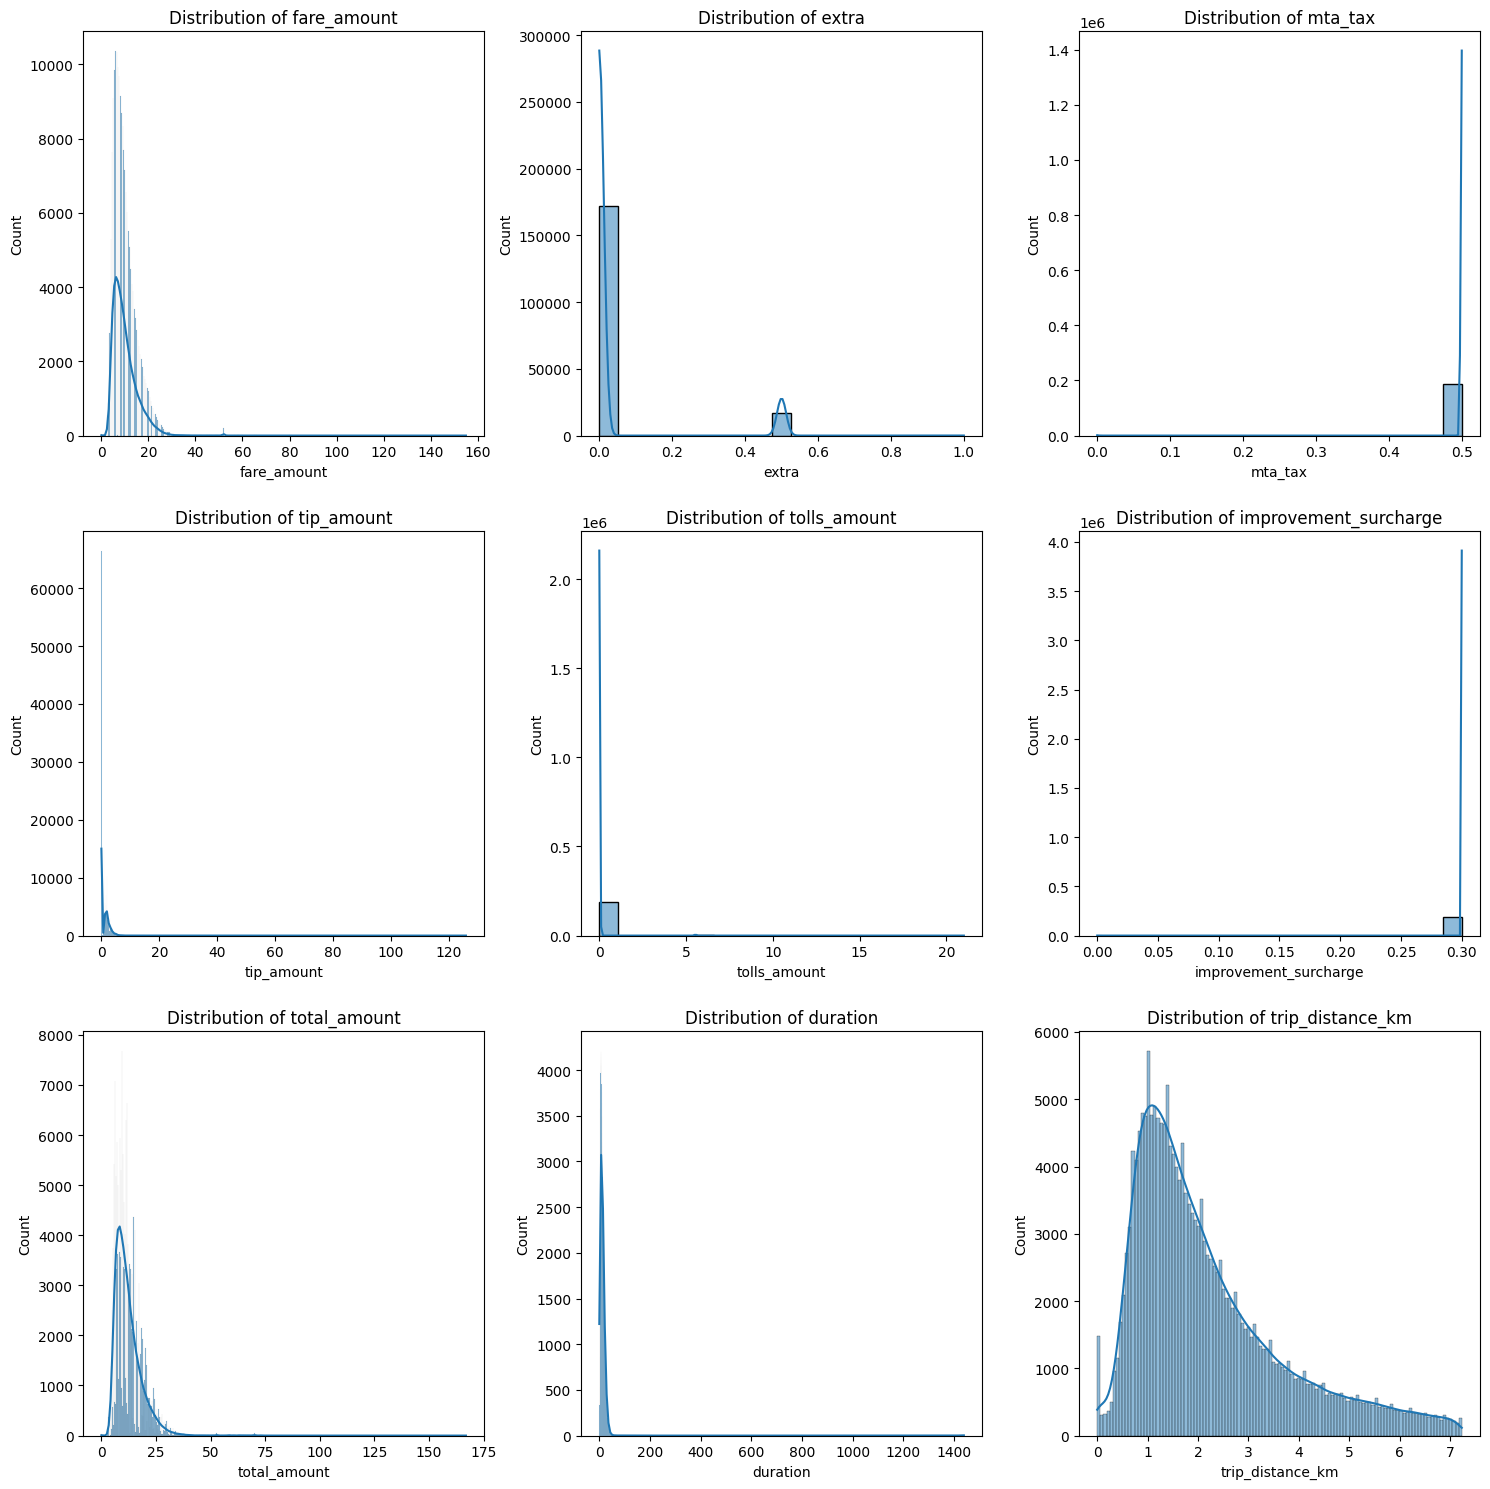

In [205]:
import matplotlib.pyplot as plt
import seaborn as sns

cols = [
    'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount',
    'improvement_surcharge', 'total_amount', 'duration',
    'trip_distance_km'
]

n_cols = 3  # 3 plots per row
n_rows = (len(cols) + n_cols - 1) // n_cols  # calculate rows needed

plt.figure(figsize=(15, 5 * n_rows))  # width, height depends on rows

for i, col in enumerate(cols):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.histplot(df[col], kde=True)  # distplot deprecated, use histplot + kde
    plt.title(f'Distribution of {col}')

plt.tight_layout()
plt.show()


## Encode Categorical Data

In [206]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 188829 entries, 0 to 212343
Data columns (total 32 columns):
 #   Column                 Non-Null Count   Dtype                     
---  ------                 --------------   -----                     
 0   VendorID               188829 non-null  int64                     
 1   tpep_pickup_datetime   188829 non-null  datetime64[ns, US/Eastern]
 2   tpep_dropoff_datetime  188829 non-null  datetime64[ns, US/Eastern]
 3   passenger_count        188829 non-null  int64                     
 4   pickup_longitude       188829 non-null  float64                   
 5   pickup_latitude        188829 non-null  float64                   
 6   RatecodeID             188829 non-null  int64                     
 7   store_and_fwd_flag     188829 non-null  object                    
 8   dropoff_longitude      188829 non-null  float64                   
 9   dropoff_latitude       188829 non-null  float64                   
 10  payment_type           18

In [207]:
df.drop(['trip_length','am/pm',
       'is_late_night','tpep_dropoff_datetime','tpep_pickup_datetime','fare_per_km'],axis=1,inplace=True)

In [208]:
df.store_and_fwd_flag.unique()

array(['N', 'Y'], dtype=object)

In [209]:
df['store_and_fwd_flag'] = df['store_and_fwd_flag'].map({'N': 0, 'Y': 1})

In [210]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df['pickup_area'] = le.fit_transform(df['pickup_area'])
df['dropoff_area'] = le.fit_transform(df['dropoff_area'])


## Correlation Analysis

In [211]:
df.isna().sum()

,0
VendorID,0
passenger_count,0
pickup_longitude,0
pickup_latitude,0
RatecodeID,0
store_and_fwd_flag,0
dropoff_longitude,0
dropoff_latitude,0
payment_type,0
fare_amount,0


In [212]:
df.dropna(inplace=True)

In [213]:
df.columns

Index(['VendorID', 'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'RatecodeID', 'store_and_fwd_flag', 'dropoff_longitude',
       'dropoff_latitude', 'payment_type', 'fare_amount', 'extra', 'mta_tax',
       'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount',
       'pickup_area', 'dropoff_area', 'Day', 'Month', 'duration',
       'day_of_week', 'hour', 'trip_distance_km', 'other_charges',
       'is_peak_time'],
      dtype='object')

In [214]:
df.corr()

,VendorID,passenger_count,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,...,pickup_area,dropoff_area,Day,Month,duration,day_of_week,hour,trip_distance_km,other_charges,is_peak_time
VendorID,1.000000,0.279993,-0.001171,0.009963,-0.012929,-0.079817,-0.016781,0.008939,-0.011918,0.031396,...,0.003278,0.009950,0.167042,0.129051,0.032998,0.496714,-0.024444,-0.013256,-0.000857,-0.040409
passenger_count,0.279993,1.000000,-0.003931,0.001871,-0.006023,-0.022492,-0.005369,0.000624,-0.000169,0.010905,...,0.003214,0.005231,0.054843,0.028519,0.011029,0.138430,0.003509,-0.003493,-0.001362,-0.013072
pickup_longitude,-0.001171,-0.003931,1.000000,0.431060,0.032856,0.006987,0.656947,0.255035,0.082793,0.043415,...,0.233943,0.106505,-0.001804,-0.003732,-0.004143,-0.009526,-0.009893,0.012657,-0.006020,-0.001494
pickup_latitude,0.009963,0.001871,0.431060,1.000000,-0.018922,-0.003795,0.232886,0.655676,0.037574,-0.080821,...,0.378720,0.209332,-0.083606,0.097028,-0.008096,0.039034,-0.089228,-0.067809,-0.070169,0.049129
RatecodeID,-0.012929,-0.006023,0.032856,-0.018922,1.000000,0.006035,0.026619,-0.018409,0.007146,0.111301,...,-0.005317,-0.001723,0.011378,-0.016555,-0.000781,-0.011274,0.013483,-0.011096,0.061023,-0.008923
store_and_fwd_flag,-0.079817,-0.022492,0.006987,-0.003795,0.006035,1.000000,0.010863,-0.001056,0.009955,0.003515,...,-0.001272,-0.001095,-0.008881,-0.014942,-0.002226,-0.040790,0.009114,0.006217,0.000418,0.001756
dropoff_longitude,-0.016781,-0.005369,0.656947,0.232886,0.026619,0.010863,1.000000,0.418588,0.099169,0.034041,...,0.138630,0.145449,0.090143,-0.112493,-0.005576,-0.056107,0.092055,0.032929,-0.006952,-0.069183
dropoff_latitude,0.008939,0.000624,0.255035,0.655676,-0.018409,-0.001056,0.418588,1.000000,0.042356,-0.151337,...,0.257298,0.283977,-0.072903,0.087036,-0.019882,0.038361,-0.077722,-0.123430,-0.100304,0.026626
payment_type,-0.011918,-0.000169,0.082793,0.037574,0.007146,0.009955,0.099169,0.042356,1.000000,-0.076425,...,0.000696,0.021483,0.047987,-0.053049,-0.005367,-0.017703,0.072059,-0.084479,-0.586525,-0.068230
fare_amount,0.031396,0.010905,0.043415,-0.080821,0.111301,0.003515,0.034041,-0.151337,-0.076425,1.000000,...,-0.022097,-0.084114,0.020712,0.008053,0.128947,0.047443,0.030455,0.762853,0.470348,0.006534


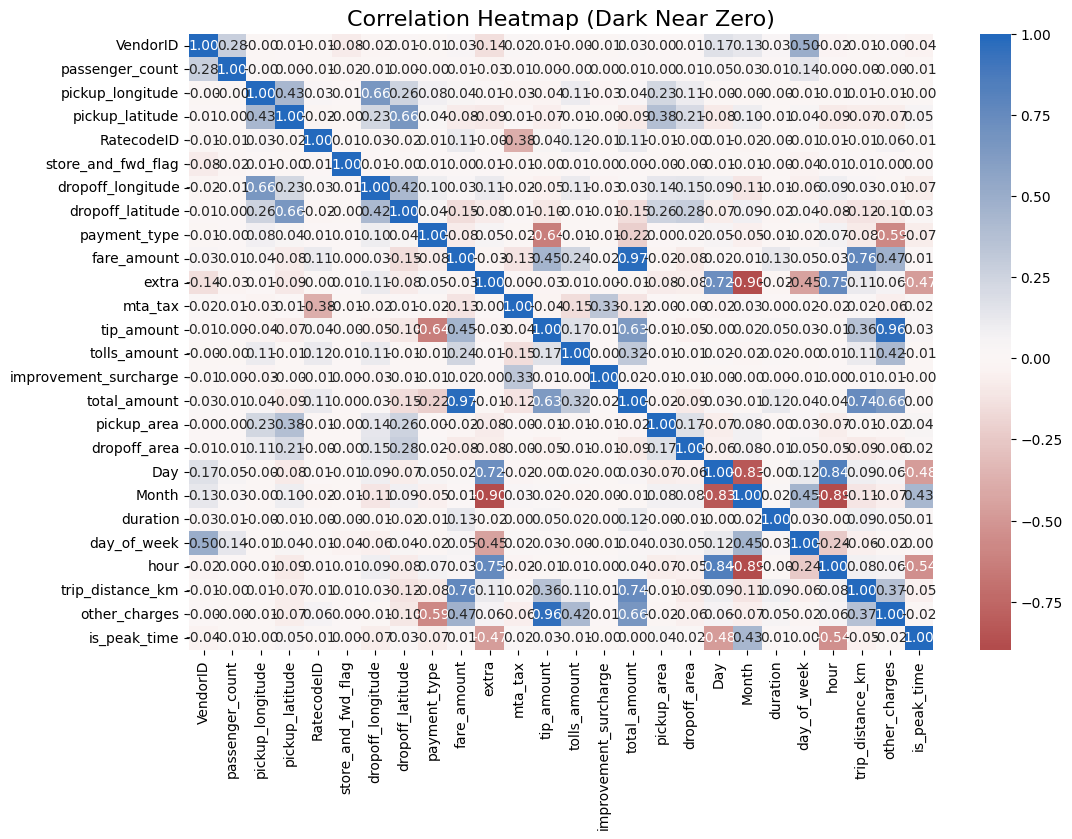

In [215]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix
corr = df.corr(numeric_only=True)

plt.figure(figsize=(12, 8))
sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    cmap="vlag_r",   # Dark around 0, light at -1 and 1
    center=0,
    cbar=True
)
plt.title("Correlation Heatmap (Dark Near Zero)", fontsize=16)
plt.show()


## Statistical Analysis

In [216]:
from scipy import stats


In [217]:
continuous = [
    'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
    'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount',
    'improvement_surcharge', 'total_amount', 'duration', 'trip_distance_km'
]

categories = [
    'VendorID', 'passenger_count', 'RatecodeID', 'store_and_fwd_flag',
    'payment_type', 'Day', 'Month', 'day_of_week', 'hour'
]


In [218]:
#TWO SAMPLE T - TEST : continuous vs continuous
def two_sample(d1,d2):
  t=0
  f=0
  for i in  range(31):
    sample1=d1.sample(frac=0.03)
    sample2=d2.sample(frac=0.03)
    t_test,p_value=stats.ttest_ind(sample1,sample2)
    if p_value < 0.05:
      f=f+1
    else:
      t=t+1
  if t>f:
    return True
  else:
    return False


In [219]:
#CHI-SQUARE TEST - category vs category
def chisquare_cat_vs_cat(d1,d2):
    return True if stats.chi2_contingency(pd.crosstab(d1,d2))[1] < 0.05 else False

In [220]:
#ANNOVA TEST - continious vs category
def annova_test(d1,d2):
    group= df[d2].unique()
    data = {}
    for i in group:
        data[i]=df[d1][df[d2]==i]
    f_value,p_value=stats.f_oneway(*[i for i in data.values()])
    return False if p_value < 0.05 else True

In [221]:
#All the statistical test being done across all the columns
final = {}
for i in df.columns:
    final[i]={}
    for j in df.columns:
        if (i in continuous) and (j in continuous):
            result=two_sample(df[i],df[j])
        elif (i in continuous) and (j in categories):
            result=annova_test(i,j)
        elif (i in categories) and (j in continuous):
            result=annova_test(j,i)
        elif (i in categories) and (j in categories):
            result=chisquare_cat_vs_cat(df[i],df[j])
        if result:
            final[i][j]=1
        else:
            final[i][j]=0

In [222]:
#The result of the statistical test which was in a dictionary is put into a dataframe
final_df = pd.DataFrame(final)
final_df

,VendorID,passenger_count,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,...,pickup_area,dropoff_area,Day,Month,duration,day_of_week,hour,trip_distance_km,other_charges,is_peak_time
VendorID,1,1,1,0,1,1,0,0,1,0,...,0,0,1,1,0,1,1,0,1,1
passenger_count,1,1,0,1,1,1,0,1,1,0,...,0,0,1,1,0,1,1,0,1,1
pickup_longitude,1,0,1,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,1
pickup_latitude,0,1,0,1,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,1,1
RatecodeID,1,1,0,0,1,1,0,0,1,0,...,0,0,1,1,1,1,1,0,1,1
store_and_fwd_flag,1,1,0,1,1,1,0,1,1,1,...,0,0,1,1,1,1,1,0,1,1
dropoff_longitude,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,1
dropoff_latitude,0,1,0,1,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,1,1
payment_type,1,1,0,0,1,1,0,0,1,0,...,0,0,1,1,0,1,1,0,1,1
fare_amount,0,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,1,1


<Axes: >

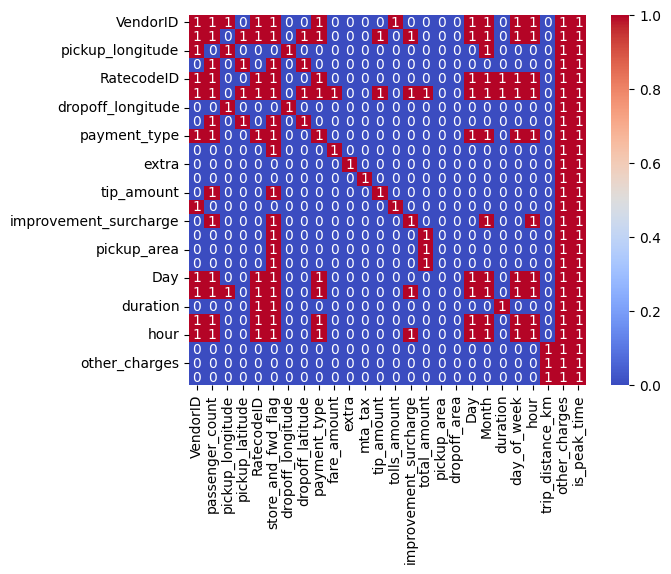

In [223]:
import seaborn as sns
#heatmap analysis for better visualisation of the stastical test results
sns.heatmap(final_df,annot=True,cmap="coolwarm")

In [224]:
#INFERENCES:
#Though some columns showed minimal correlation, through statistical test we found it shows  significance.
# Thus we are going ahead without droping any columns except below
# 'pickup_longitude', 'pickup_latitude','dropoff_longitude','dropoff_latitude' as we have already extracted pickup_area and dropoff_area from these coordinates

In [225]:
df.drop(['pickup_longitude', 'pickup_latitude','dropoff_longitude','dropoff_latitude'],axis=1,inplace=True)

In [226]:
df.columns

Index(['VendorID', 'passenger_count', 'RatecodeID', 'store_and_fwd_flag',
       'payment_type', 'fare_amount', 'extra', 'mta_tax', 'tip_amount',
       'tolls_amount', 'improvement_surcharge', 'total_amount', 'pickup_area',
       'dropoff_area', 'Day', 'Month', 'duration', 'day_of_week', 'hour',
       'trip_distance_km', 'other_charges', 'is_peak_time'],
      dtype='object')

# Machine Learning

### Split Train/Test data

In [227]:
import numpy as np
from sklearn.model_selection import train_test_split

# -------------------------
# 0️⃣ Data cleaning function
# -------------------------
def clean_dataframe(df, y_cols, clip_limit=1e10):
    # Replace inf/-inf with NaN
    df = df.replace([np.inf, -np.inf], np.nan)

    # Fill NaN with 0
    df = df.fillna(0)

    # Clip numeric columns to avoid overflow
    num_cols = df.select_dtypes(include=[np.number]).columns
    df[num_cols] = df[num_cols].clip(lower=-clip_limit, upper=clip_limit)

    return df

# -------------------------
# 1️⃣ Define target columns
# -------------------------
target_cols = ['other_charges', 'fare_amount',
               'total_amount', 'duration', 'tip_amount']

# Clean entire dataframe first
df = clean_dataframe(df, target_cols)

# -------------------------
# 2️⃣ Split X and Y
# -------------------------
X = df.drop(columns=target_cols)
Y = df[target_cols]

# -------------------------
# 3️⃣ Train/test split
# -------------------------
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42
)


### Linear Regression(Multivariate)

In [ ]:
import numpy as np
import pandas as pd
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import train_test_split, HalvingRandomSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.multioutput import MultiOutputRegressor
from sklearn.preprocessing import StandardScaler

# Scale once outside CV
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Base model
base_estimator = LinearRegression()

# Multioutput wrapper
multi_output_model = MultiOutputRegressor(base_estimator, n_jobs=-1)

# Param grid (very small for LinearRegression)
param_distributions = {
    'estimator__fit_intercept': [True, False],
    'estimator__positive': [True, False]
}

# Halving search
search = HalvingRandomSearchCV(
    estimator=multi_output_model,
    param_distributions=param_distributions,
    factor=2,
    resource='n_samples',
    max_resources='auto',
    min_resources=50,
    aggressive_elimination=True,
    scoring='r2',
    cv=3,
    random_state=42,
    verbose=1,
    n_jobs=-1
)

search.fit(X_train_scaled, Y_train)

print("Best Params:", search.best_params_)
print("Best CV Score:", search.best_score_)

# Predictions
best_model_lr = search.best_estimator_
y_pred = best_model_lr.predict(X_test_scaled)
y_pred_df = pd.DataFrame(y_pred, columns=target_cols, index=Y_test.index)

# Metrics
metrics_df = pd.DataFrame([
    [col,
     r2_score(Y_test[col], y_pred_df[col]),
     mean_squared_error(Y_test[col], y_pred_df[col]),
     np.sqrt(mean_squared_error(Y_test[col], y_pred_df[col])),
     mean_absolute_error(Y_test[col], y_pred_df[col])]
    for col in target_cols
], columns=['Target', 'R2', 'MSE', 'RMSE', 'MAE'])

print(metrics_df)


n_iterations: 3
n_required_iterations: 3
n_possible_iterations: 12
min_resources_: 50
max_resources_: 151063
aggressive_elimination: True
factor: 2
----------
iter: 0
n_candidates: 4
n_resources: 25600
Fitting 3 folds for each of 4 candidates, totalling 12 fits
----------
iter: 1
n_candidates: 2
n_resources: 51200
Fitting 3 folds for each of 2 candidates, totalling 6 fits
----------
iter: 2
n_candidates: 1
n_resources: 102400
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Best Params: {'estimator__positive': False, 'estimator__fit_intercept': True}
Best CV Score: 0.4818148401898786
          Target        R2       MSE      RMSE       MAE
0  other_charges  0.501850  1.447057  1.202937  0.602065
1    fare_amount  0.561370  0.020683  0.143816  0.080875
2   total_amount  0.574820  0.019636  0.140127  0.079336
3       duration  0.521443  0.349238  0.590964  0.402441
4     tip_amount  0.666358  0.043374  0.208264  0.133195


### XGBOOST Regressor (Multivariate)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.multioutput import MultiOutputRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from xgboost import XGBRegressor
from scipy.stats import uniform, randint

# -------------------------
# 1️⃣ Base XGBoost Model
# -------------------------
xgb_base = XGBRegressor(
    random_state=42,
    n_jobs=-1,
    tree_method="hist",   # Fastest
    max_bin=256,          # Speed up histograms
    verbosity=0
)

multi_xgb = MultiOutputRegressor(xgb_base, n_jobs=-1)

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', multi_xgb)
])

# -------------------------
# 2️⃣ Reduced Search Space
# -------------------------
param_distributions = {
    'model__estimator__n_estimators': randint(80, 200),     # Lower upper bound
    'model__estimator__learning_rate': uniform(0.05, 0.2),  # Narrow range
    'model__estimator__max_depth': randint(3, 6),           # Shallower trees
    'model__estimator__subsample': uniform(0.7, 0.3),
    'model__estimator__colsample_bytree': uniform(0.7, 0.3),
    'model__estimator__reg_alpha': uniform(0, 0.5),
    'model__estimator__reg_lambda': uniform(0.8, 1.2)
}

# -------------------------
# 3️⃣ Randomized Search (Reduced Iterations)
# -------------------------
random_search = RandomizedSearchCV(
    pipeline,
    param_distributions=param_distributions,
    n_iter=5,             # Fewer iterations
    scoring='r2',
    cv=3,                 # Keep CV=3
    random_state=42,
    n_jobs=-1,
    verbose=1
)

# -------------------------
# 4️⃣ Fit Model
# -------------------------
random_search.fit(X_train, Y_train)

print("Best Parameters:", random_search.best_params_)
print("Best CV R² Score:", random_search.best_score_)

# -------------------------
# 5️⃣ Predictions with Best Model
# -------------------------
best_model_xgb = random_search.best_estimator_
y_pred = best_model_xgb.predict(X_test)
y_pred_df = pd.DataFrame(y_pred, columns=target_cols, index=Y_test.index)

# -------------------------
# 6️⃣ Evaluation Metrics per Target
# -------------------------
metrics = []
for col in target_cols:
    y_true = Y_test[col]
    y_hat = y_pred_df[col]
    r2 = r2_score(y_true, y_hat)
    mse = mean_squared_error(y_true, y_hat)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_hat)
    metrics.append([col, r2, mse, rmse, mae])

metrics_df = pd.DataFrame(metrics, columns=['Target', 'R2', 'MSE', 'RMSE', 'MAE'])
print("\nTest Set Performance:")
print(metrics_df)


Fitting 3 folds for each of 5 candidates, totalling 15 fits
Best Parameters: {'model__estimator__colsample_bytree': np.float64(0.7174250836504598), 'model__estimator__learning_rate': np.float64(0.22323522915498706), 'model__estimator__max_depth': 5, 'model__estimator__n_estimators': 101, 'model__estimator__reg_alpha': np.float64(0.028205789513550128), 'model__estimator__reg_lambda': np.float64(1.6663985267201897), 'model__estimator__subsample': np.float64(0.981565812704725)}
Best CV R² Score: 0.7469916939735413

Test Set Performance:
          Target        R2       MSE      RMSE       MAE
0  other_charges  0.581749  1.214963  1.102254  0.440281
1    fare_amount  0.727343  0.012857  0.113388  0.058624
2   total_amount  0.728105  0.012557  0.112056  0.057749
3       duration  0.652349  0.253707  0.503693  0.317255
4     tip_amount  0.743916  0.033291  0.182459  0.097818


### Random Forest (Multivariate)

In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# ========= 1. Scale features =========
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ========= 2. Direct Multi-output Random Forest =========
# scikit-learn RandomForestRegressor supports multi-output natively
rf_model = RandomForestRegressor(
    n_estimators=100,      # fewer trees for speed
    max_depth=15,          # limit depth
    min_samples_split=5,
    min_samples_leaf=2,
    max_features='sqrt',
    random_state=42,
    n_jobs=-1
)

# ========= 3. Train Model =========
rf_model.fit(X_train_scaled, Y_train)

# ========= 4. Predictions =========
y_pred = rf_model.predict(X_test_scaled)
y_pred_df = pd.DataFrame(y_pred, columns=target_cols, index=Y_test.index)

# ========= 5. Metrics =========
metrics_df = pd.DataFrame([
    [col,
     r2_score(Y_test[col], y_pred_df[col]),
     mean_squared_error(Y_test[col], y_pred_df[col]),
     np.sqrt(mean_squared_error(Y_test[col], y_pred_df[col])),
     mean_absolute_error(Y_test[col], y_pred_df[col])]
    for col in target_cols
], columns=['Target', 'R2', 'MSE', 'RMSE', 'MAE'])

print(metrics_df)


          Target        R2       MSE      RMSE       MAE
0  other_charges  0.588912  1.194154  1.092774  0.449043
1    fare_amount  0.704974  0.013912  0.117948  0.066731
2   total_amount  0.711564  0.013320  0.115414  0.065002
3       duration  0.607697  0.286293  0.535063  0.350567
4     tip_amount  0.738011  0.034059  0.184551  0.103519


### SVR (MultiVariate)

In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import SGDRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# ========= 1. Scaling =========
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ========= 2. Base SGD Regressor (fastest option) =========
base_sgd = SGDRegressor(
    loss='squared_error',   # Linear regression loss
    penalty='l2',           # Ridge regularization
    alpha=0.0001,           # Regularization strength
    max_iter=1000,          # Number of epochs
    tol=1e-3,               # Early stopping tolerance
    random_state=42
)

# ========= 3. Multi-output Wrapper =========
model = MultiOutputRegressor(base_sgd, n_jobs=-1)

# ========= 4. Train Model =========
model.fit(X_train_scaled, Y_train)

# ========= 5. Predictions =========
y_pred = model.predict(X_test_scaled)
y_pred_df = pd.DataFrame(y_pred, columns=target_cols, index=Y_test.index)

# ========= 6. Metrics =========
metrics_df = pd.DataFrame([
    [col,
     r2_score(Y_test[col], y_pred_df[col]),
     mean_squared_error(Y_test[col], y_pred_df[col]),
     np.sqrt(mean_squared_error(Y_test[col], y_pred_df[col])),
     mean_absolute_error(Y_test[col], y_pred_df[col])]
    for col in target_cols
], columns=['Target', 'R2', 'MSE', 'RMSE', 'MAE'])

print(metrics_df)


          Target        R2       MSE      RMSE       MAE
0  other_charges  0.245338  2.192192  1.480605  0.672305
1    fare_amount  0.395689  0.028496  0.168806  0.086127
2   total_amount  0.435042  0.026091  0.161526  0.083774
3       duration  0.493291  0.369783  0.608098  0.408609
4     tip_amount  0.652817  0.045134  0.212448  0.134495


### LightGBM (Multivariate)

In [228]:
import pandas as pd
import lightgbm as lgb
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler

# -------------------------------
# 1️⃣ Train-Test Split
# -------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42
)

# -------------------------------
# 2️⃣ Scale Features & Targets
# -------------------------------
X_scaler = StandardScaler()
y_scaler = StandardScaler()

X_train_scaled = X_scaler.fit_transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

y_train_scaled = y_scaler.fit_transform(y_train)
y_test_scaled = y_scaler.transform(y_test)  # only for metric calculation after inverse_transform

# -------------------------------
# 3️⃣ LightGBM MultiOutput Model
# -------------------------------
lgb_base = lgb.LGBMRegressor(random_state=42, n_jobs=-1)
multi_lgb = MultiOutputRegressor(lgb_base)

# Optional: small param grid for GridSearchCV
param_grid = {
    "estimator__num_leaves": [15, 31],
    "estimator__learning_rate": [0.1],
    "estimator__n_estimators": [100]
}

grid_search = GridSearchCV(
    multi_lgb,
    param_grid,
    cv=2,
    scoring="neg_mean_squared_error",
    verbose=2,
    n_jobs=-1
)

grid_search.fit(X_train_scaled, y_train_scaled)

best_model_lgm = grid_search.best_estimator_
print("Best parameters:", grid_search.best_params_)

# -------------------------------
# 4️⃣ Predictions & Inverse Transform
# -------------------------------
y_pred_scaled = best_model_lgm.predict(X_test_scaled)
y_pred = y_scaler.inverse_transform(y_pred_scaled)  # back to original scale

# Convert to DataFrame for convenience
y_pred_df = pd.DataFrame(y_pred, columns=Y.columns)
y_test_df = pd.DataFrame(y_test.values, columns=Y.columns)

# -------------------------------
# 5️⃣ Metrics
# -------------------------------
metrics_df = pd.DataFrame([
    [
        col,
        r2_score(y_test_df[col], y_pred_df[col]),
        mean_squared_error(y_test_df[col], y_pred_df[col]),
        mean_squared_error(y_test_df[col], y_pred_df[col]) ** 0.5,
        mean_absolute_error(y_test_df[col], y_pred_df[col])
    ]
    for col in Y.columns
], columns=['Target', 'R2', 'MSE', 'RMSE', 'MAE'])

print(metrics_df)


Fitting 2 folds for each of 2 candidates, totalling 4 fits
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008600 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 601
[LightGBM] [Info] Number of data points in the train set: 151063, number of used features: 16
[LightGBM] [Info] Start training from score -0.000000
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.018644 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 601
[LightGBM] [Info] Number of data points in the train set: 151063, number of used features: 16
[LightGBM] [Info] Start training from score -0.000000
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.066077 seconds.
You can set `force_row_

### Choosing Best Model

In [ ]:
#We compared Linear Regression, Random Forest, SVR, LightGBM, and XGBoost across five target variables using R², MSE, RMSE, and MAE.

| Model                 | Overall Trend                                                                                                             |
| --------------------- | ------------------------------------------------------------------------------------------------------------------------- |
| **Linear Regression** | Baseline, interpretable, but limited in capturing non-linear patterns. R² around **0.48–0.66**.                           |
| **Random Forest**     | Strong improvement over baseline, handles non-linearities well. R² up to **0.73**.                                        |
| **SVR**               | Computationally heavy and underperformed compared to tree-based models (lowest R² on most targets).                       |
| **LightGBM**          | Highest accuracy overall — R² up to **0.745**, lowest errors on most targets, very fast training.                         |
| **XGBoost**           | Performance almost identical to LightGBM (slightly higher R² on some targets, slightly lower on others), slightly slower. |


 **Key Insights**

- **SVR** eliminated due to lower accuracy and high training time.  
- **Linear Regression** is simple but lacks predictive power for complex patterns.  
- **Random Forest** strong, but slightly less accurate and slower than boosting methods.  
- **LightGBM** and **XGBoost** clearly outperform others in both **R²** and error metrics.  

**Between LightGBM and XGBoost**
- Metrics are nearly identical.  
- **LightGBM** trains faster due to optimized histogram learning.  

---
 **Final Choice**

✅ **LightGBM Selected**  

- Matches **XGBoost** in accuracy, faster in training.  
- Consistently high **R²** (> 0.72) and lowest **MAE** across most targets.  
- Efficient and scalable for large datasets.  


## Pickling

In [232]:
import pickle

with open('best_model_lgm.pkl', 'wb') as f:
    pickle.dump(best_model_lgm, f)

print("LGB model saved as 'best_model_lgm.pkl'")


LGB model saved as 'best_model_lgm.pkl'
